In [1]:
import alpaca
from alpaca import ALPcouplings
import numpy as np
import matplotlib.pyplot as plt

from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca.plotting.mpl import exclusionplot
from alpaca.statistics import combine_chi2

from alpaca.sectors import default_sectors

plt.rcParams.update({'font.size': 20, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [260]:
ma = 2
fa = 1e7

cg_vec = np.logspace(-1, 2, 100)
cbsV_vec= np.logspace(-2, 0, 100)

cbsV_grid, cg_grid = np.meshgrid(cbsV_vec, cg_vec)

# Flatten the meshgrid arrays
cg_flat = cg_grid.flatten()
cbsV_flat = cbsV_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cg_val, cbsV_val in zip(cg_flat, cbsV_flat):
    coupling = ALPcouplings({'cg': cg_val, 'cdR': 0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]]), 'cqL': +0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=fa, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cg = np.array(couplings_list).reshape(cg_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cg_grid.shape, fa)
ma_grid = np.full(cg_grid.shape, ma)


In [261]:
chi2_cg = get_chi2(default_sectors['bsa_lfu'], ma_grid, couplings_cg, fa_grid, integrator='no_rge', min_probability=0)
chi2_cg_meas=chi2_cg[0].split_measurements()

In [262]:
chi2_obs=chi2_cg[0].split_observables()
chi2_meas=chi2_cg[0].split_measurements()
chi2_noeps = [c for c in chi2_obs if not c.sector.contains_observable('epsK')]


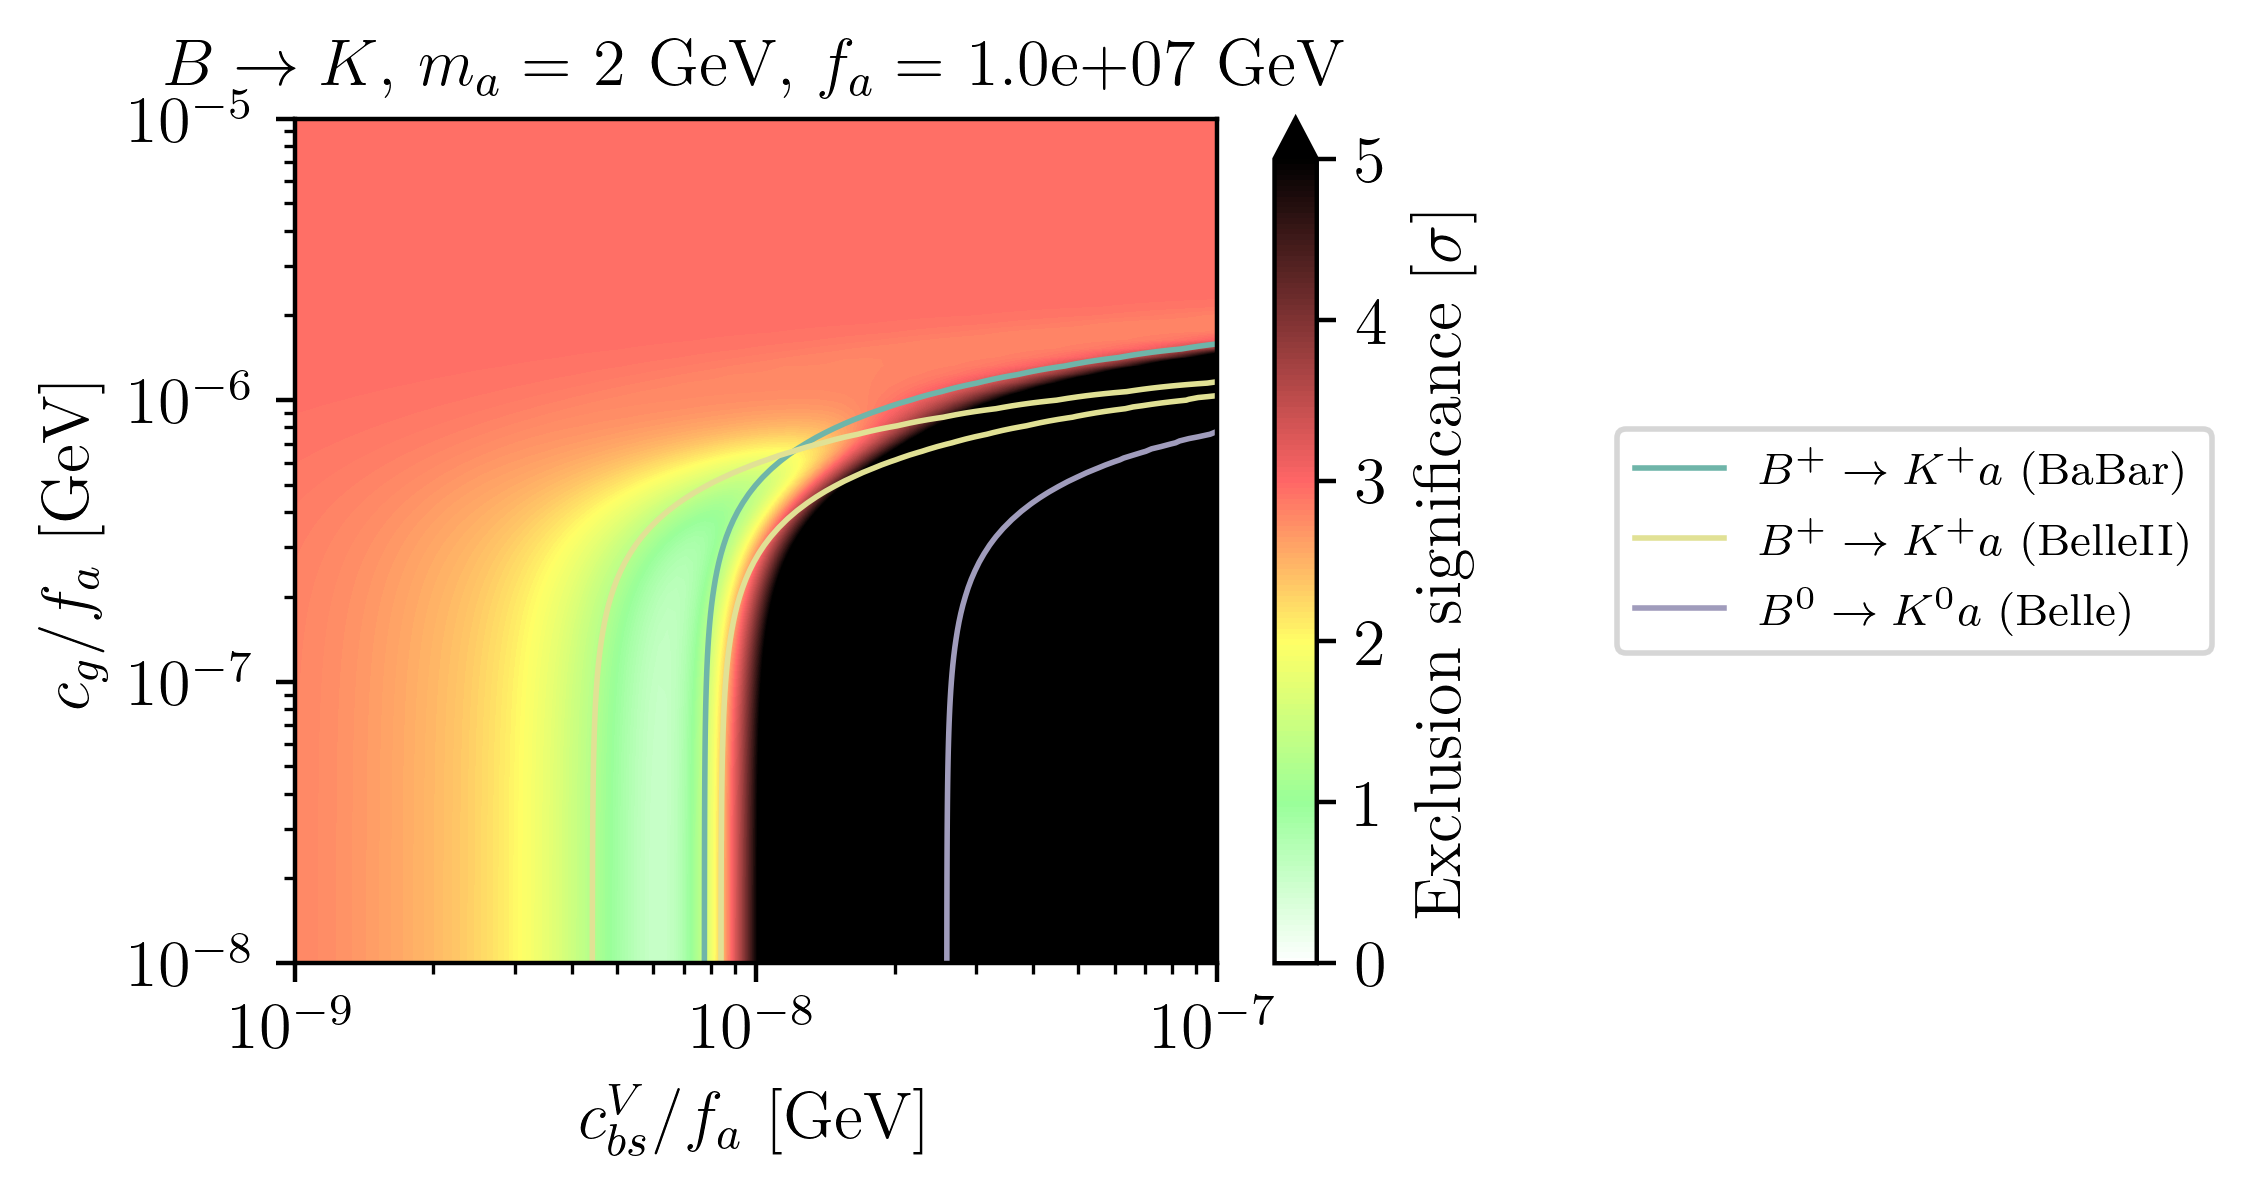

In [263]:
# chi2_g[0].split_measurements()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(cbsV_grid/fa, cg_grid/fa, chi2_cg_meas, r'$c_{bs}^V/f_a$ [GeV]', r'$c_{g}/f_a$ [GeV]', rf'$B \to K$, $m_a=$ {ma} GeV, $f_a=$ {fa:.1e} GeV', ax=ax)

fig.savefig('ALP_BK_cg.pdf', bbox_inches='tight')

In [267]:
ma = 2
fa = 1e8

cbsV_vec = np.logspace(-2,1, 100)
ceR_vec= np.logspace(-2, 1, 100)

cbsV_grid, ceR_grid = np.meshgrid(cbsV_vec, ceR_vec)

# Flatten the meshgrid arrays
ceR_flat = ceR_grid.flatten()
cbsV_flat = cbsV_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for ceR_val, cbsV_val in zip(ceR_flat, cbsV_flat):
    coupling = ALPcouplings({'ceR': ceR_val, 'cdR': 0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]]), 'cqL': +0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=fa, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cB = np.array(couplings_list).reshape(ceR_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(ceR_grid.shape, fa)
ma_grid = np.full(ceR_grid.shape, ma)

KeyboardInterrupt: 

In [ ]:
chi2_ceR_all = get_chi2(default_sectors['bsa_lfu'], ma_grid, couplings_cB, fa_grid, integrator='no_rge', min_probability=0)
chi2_ceR_all_meas = chi2_ceR_all[0].split_measurements()

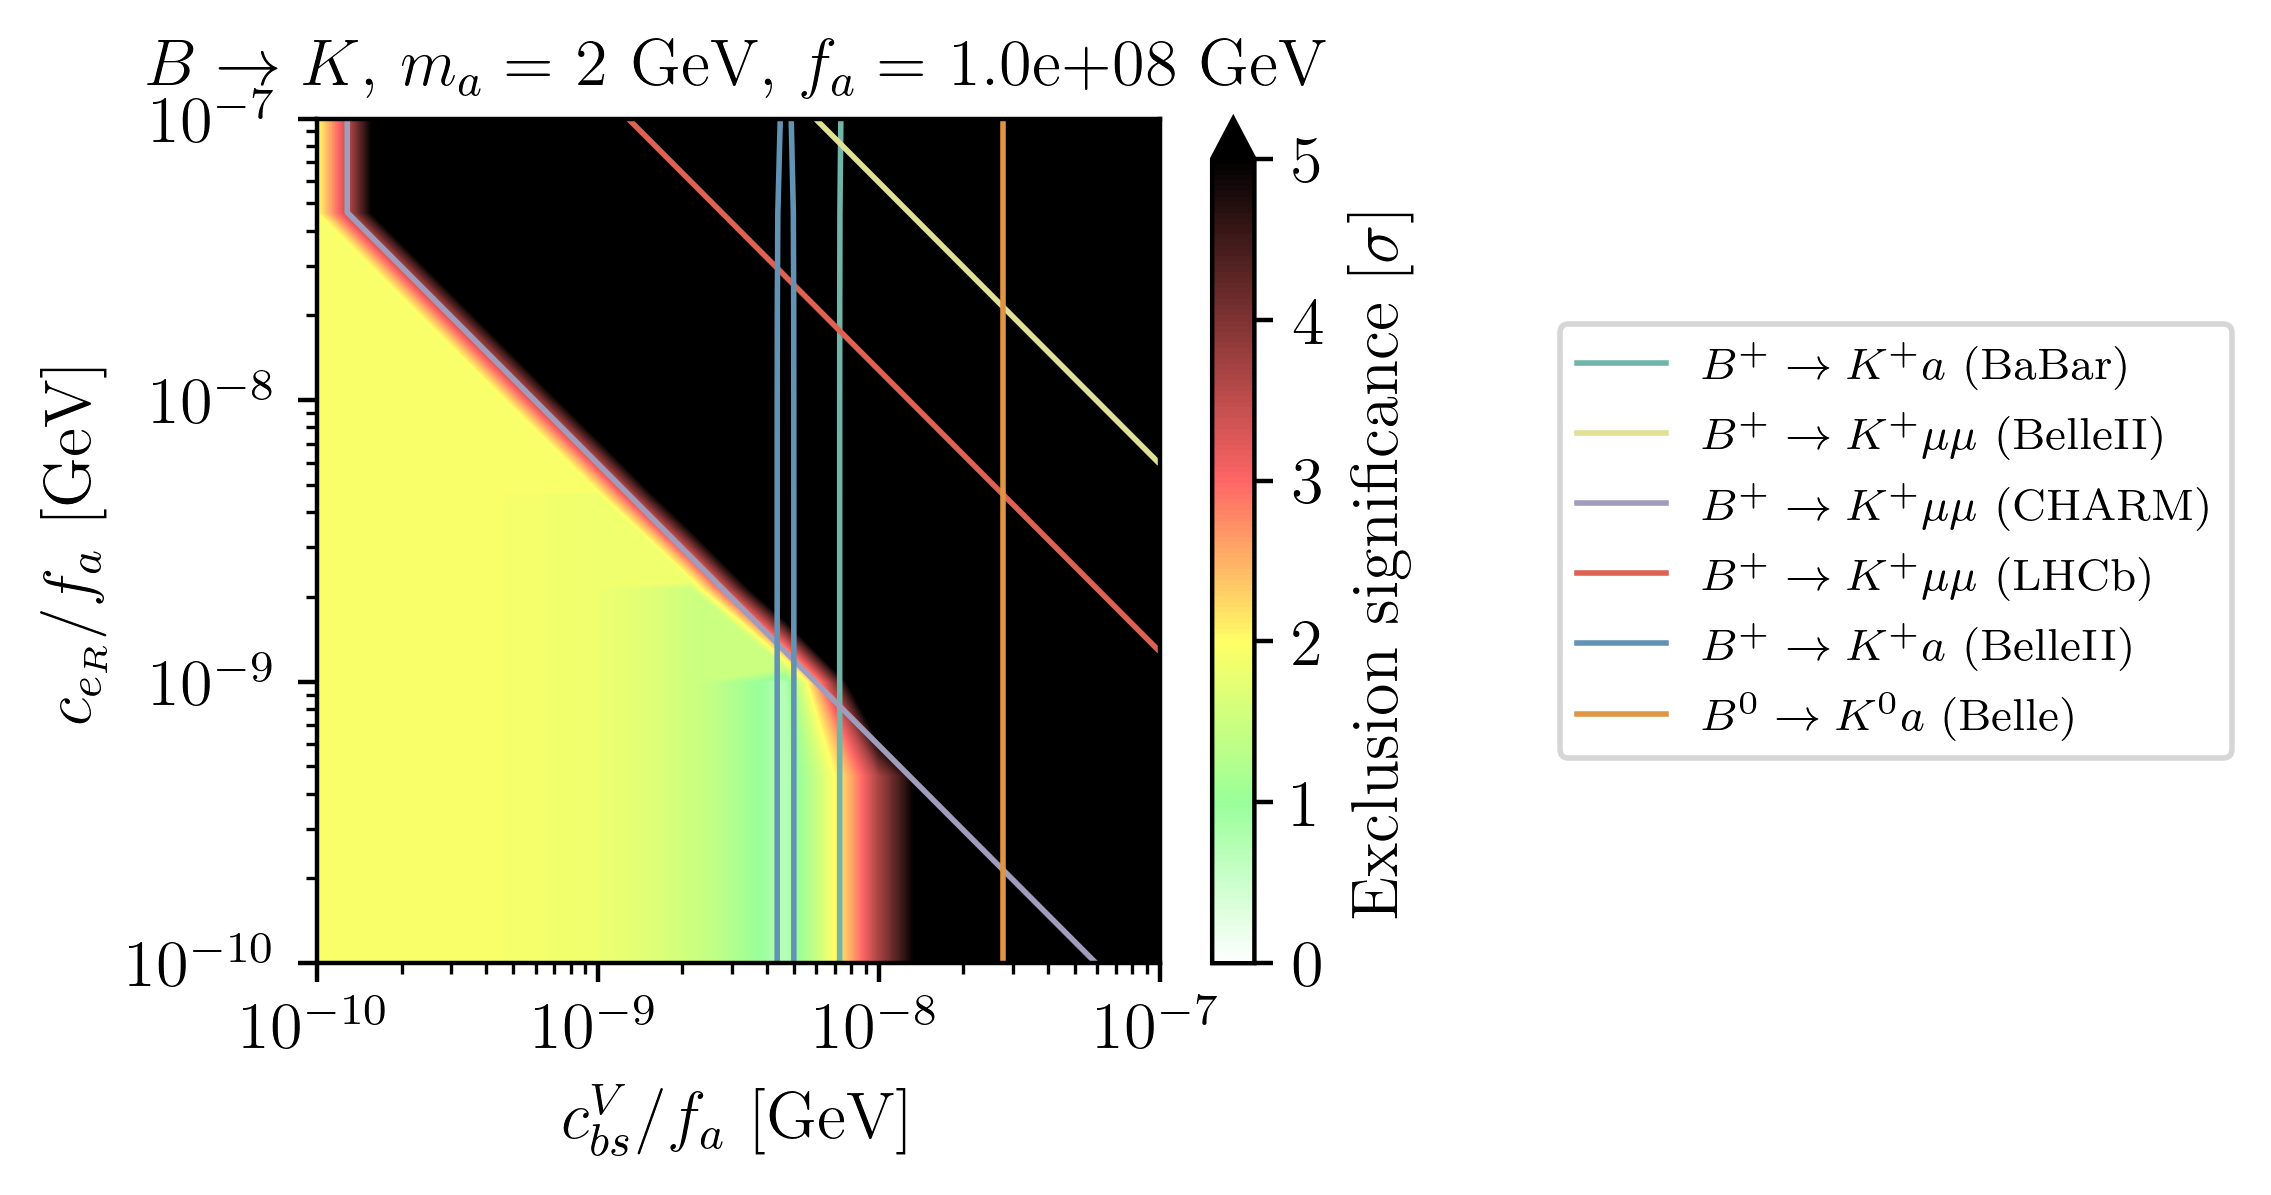

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(cbsV_grid/fa, ceR_grid/fa, chi2_ceR_all_meas, r'$c_{bs}^V/f_a$ [GeV]', r'$c_{e_R}/f_a$ [GeV]', rf'$B \to K$, $m_a=$ {ma} GeV, $f_a=$ {fa:.1e} GeV', ax=ax)

fig.savefig('ALP_BK_ceR.pdf', bbox_inches='tight')

In [264]:
ma = 2
fa = 1e5

cB_vec = np.logspace(-1, 1, 20)
cbsV_vec= np.logspace(-4, -2, 20)

cbsV_grid, cB_grid = np.meshgrid(cbsV_vec, cB_vec)

# Flatten the meshgrid arrays
cB_flat = cB_grid.flatten()
cbsV_flat = cbsV_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cB_val, cbsV_val in zip(cB_flat, cbsV_flat):
    coupling = ALPcouplings({'cB': cB_val, 'cdR': 0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]]), 'cqL': +0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=fa, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cB = np.array(couplings_list).reshape(cB_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cB_grid.shape, fa)
ma_grid = np.full(cB_grid.shape, ma)

In [265]:
# sector_BK = alpaca.sectors.Sector.load('/Users/xavierponcediaz/Dropbox/alpaca/alp-aca/alpaca/sectors/BK.yaml')
chi2_cB_BKinv = get_chi2(default_sectors['all'], ma_grid, couplings_cB, fa_grid, integrator='no_rge', min_probability=0)
chi2_cB_BK_meas = chi2_cB_BKinv[0].split_measurements()

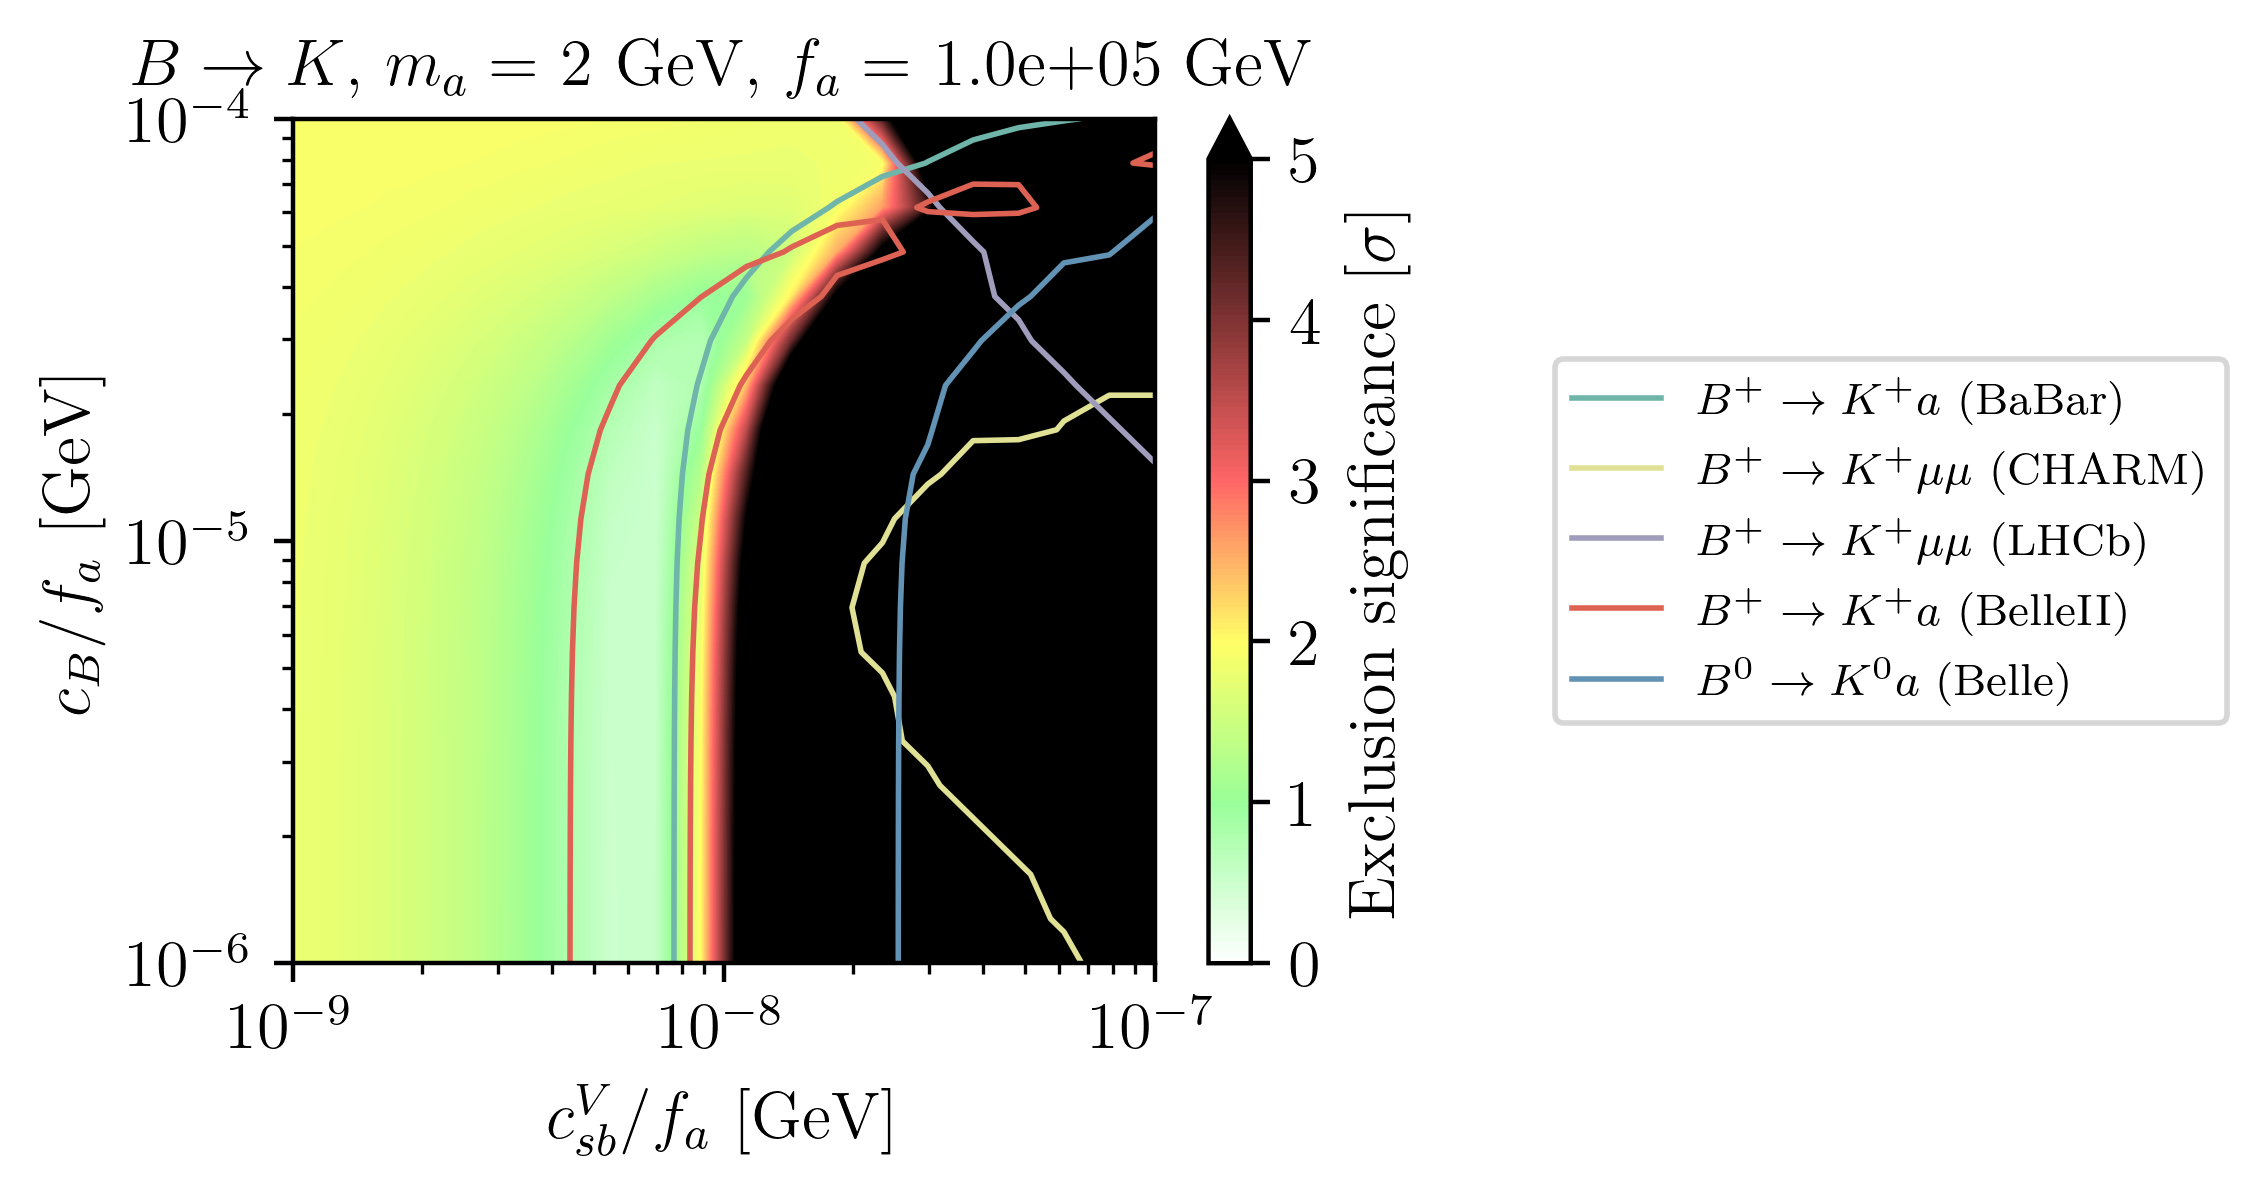

In [266]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(cbsV_grid/fa, cB_grid/fa, chi2_cB_BK_meas, r'$c_{sb}^V/f_a$ [GeV]', r'$c_{B}/f_a$ [GeV]', rf'$B \to K$, $m_a=$ {ma} GeV, $f_a=$ {fa:.1e} GeV', ax=ax)
vu_aux=np.logspace(np.log10(1), np.log10(250), 100)
vd_aux=np.logspace(np.log10(0.1), np.log10(250), 100)
vu_aux_grid, vd_aux_grid = np.meshgrid(vu_aux, vd_aux)
fig.savefig('ALP_BK_cB.pdf', bbox_inches='tight')

In [245]:
ma = 2
fa = 1e6

cB_vec = np.logspace(0, 2, 10)
cbsV_vec= np.logspace(-3, -1, 10)

cbsV_grid, cB_grid = np.meshgrid(cbsV_vec, cB_vec)

# Flatten the meshgrid arrays
cB_flat = cB_grid.flatten()
cbsV_flat = cbsV_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cB_val, cbsV_val in zip(cB_flat, cbsV_flat):
    coupling = ALPcouplings({'cW': cB_val, 'cdR': 0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]]), 'cqL': +0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=fa, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cB = np.array(couplings_list).reshape(cB_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cB_grid.shape, fa)
ma_grid = np.full(cB_grid.shape, ma)

In [246]:
# sector_BK = alpaca.sectors.Sector.load('/Users/xavierponcediaz/Dropbox/alpaca/alp-aca/alpaca/sectors/BK.yaml')
chi2_cB_BKinv = get_chi2(default_sectors['BKinv'], ma_grid, couplings_cB, fa_grid, integrator='no_rge', min_probability=0)
chi2_cB_BK_meas = chi2_cB_BKinv[0].split_measurements()

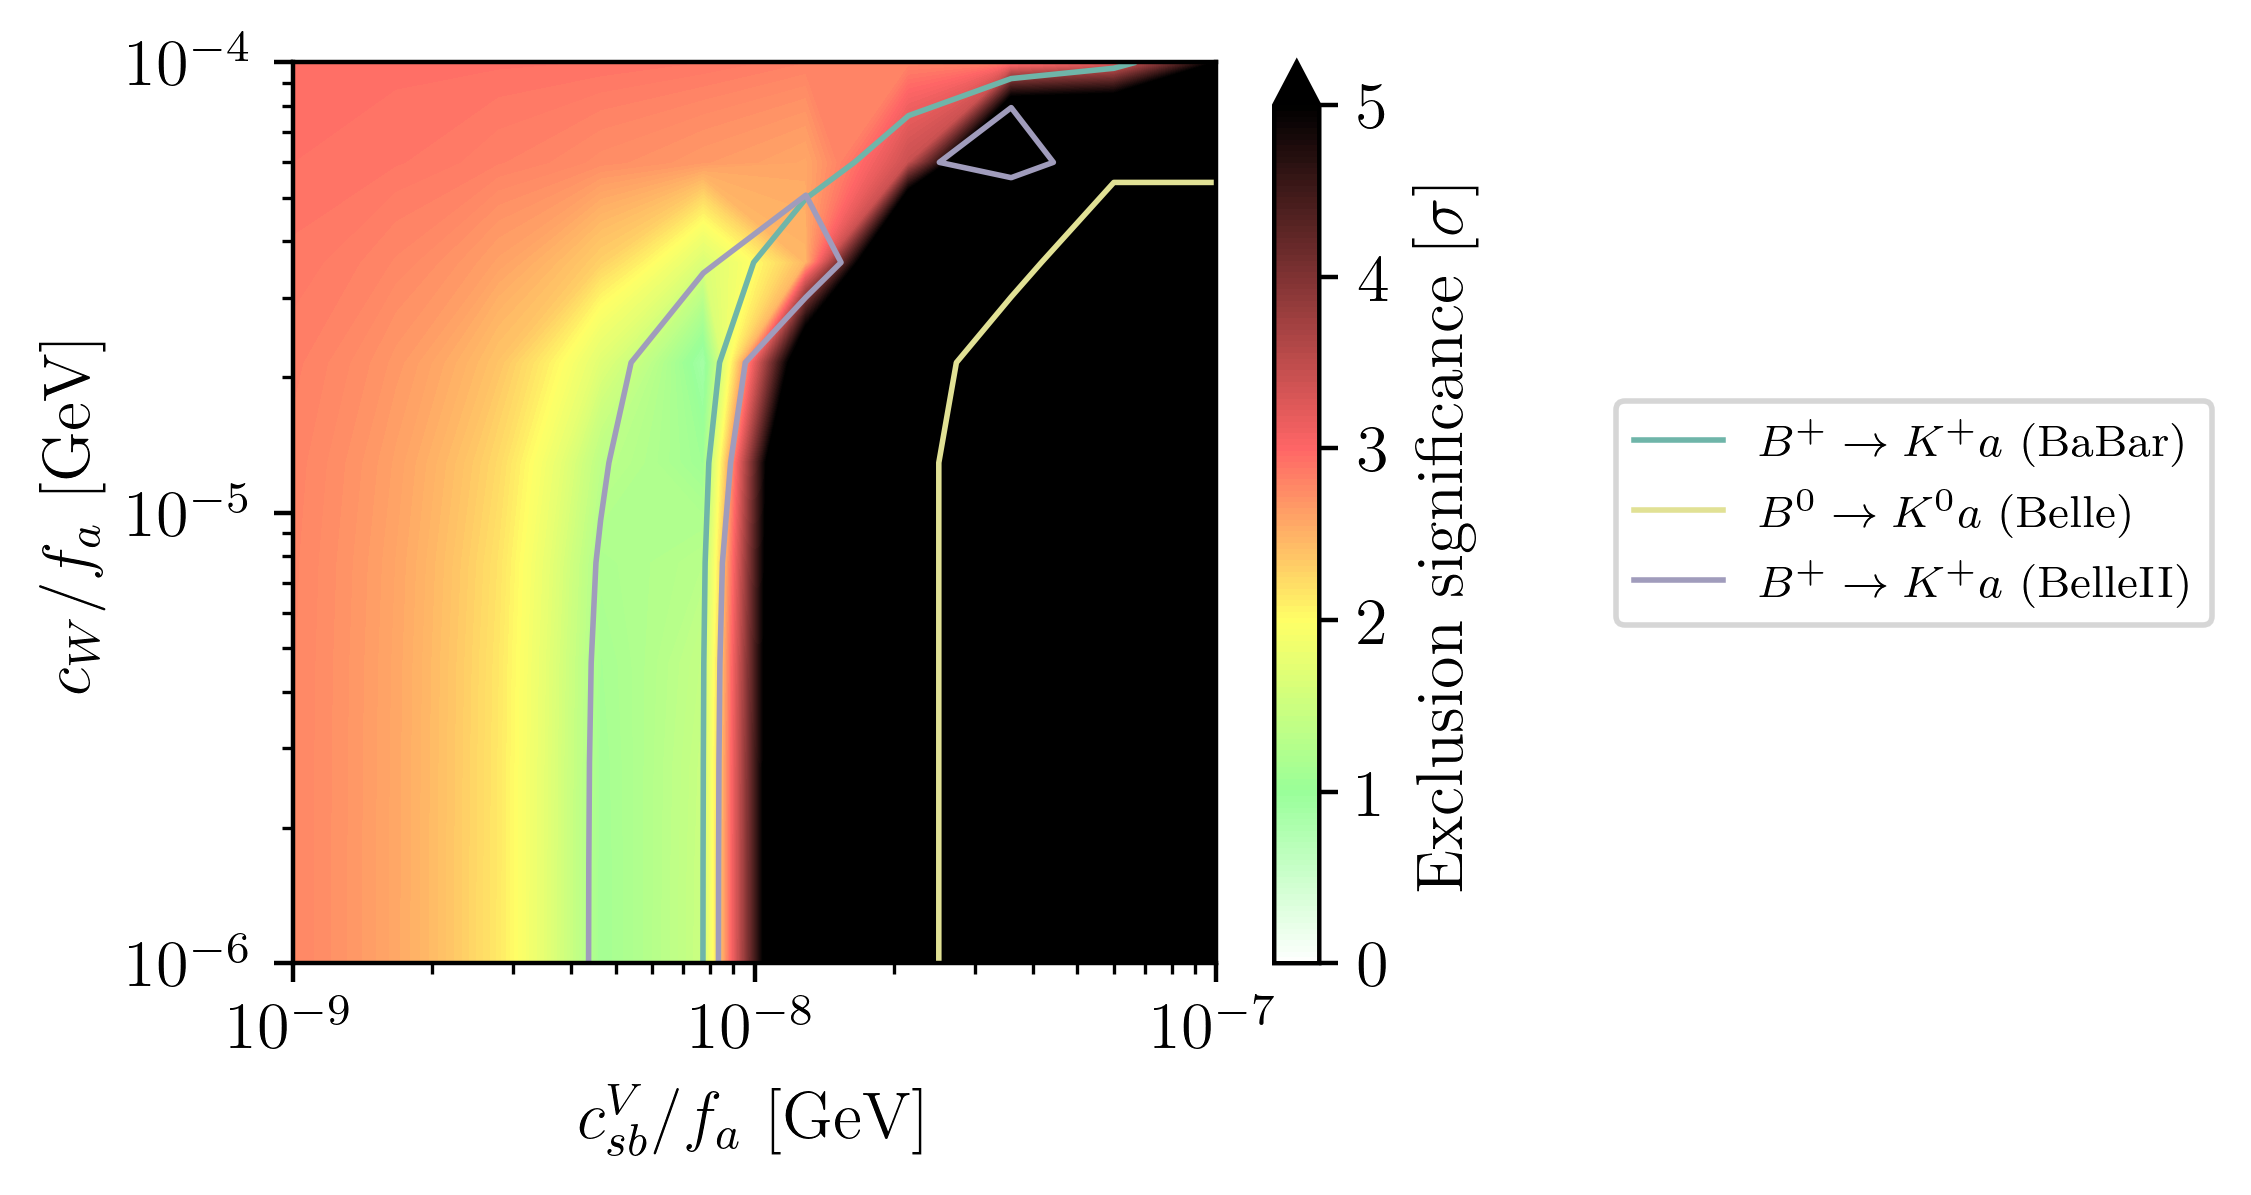

In [247]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(cbsV_grid/fa, cB_grid/fa, chi2_cB_BK_meas, r'$c_{sb}^V/f_a$ [GeV]', r'$c_{W}/f_a$ [GeV]', ax=ax)
vu_aux=np.logspace(np.log10(1), np.log10(250), 100)
vd_aux=np.logspace(np.log10(0.1), np.log10(250), 100)
vu_aux_grid, vd_aux_grid = np.meshgrid(vu_aux, vd_aux)
fig.savefig('ALP_BK_cW.pdf', bbox_inches='tight')

In [248]:
ma = 2
fa = 1e5

ct_vec = np.logspace(-4, 0, 10)
cbsV_vec= np.logspace(-4, -2, 10)

cbsV_grid, ct_grid = np.meshgrid(cbsV_vec, ct_vec)

# Flatten the meshgrid arrays
ct_flat = ct_grid.flatten()
cbsV_flat = cbsV_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for ct_val, cbsV_val in zip(ct_flat, cbsV_flat):
    coupling = ALPcouplings({'cuR': ct_val, 'cdR': 0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]]), 'cqL': +0.5*np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=fa, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_ct = np.array(couplings_list).reshape(ct_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(ct_grid.shape, fa)
ma_grid = np.full(ct_grid.shape, ma)

In [249]:
# sector_BK = alpaca.sectors.Sector.load('/Users/xavierponcediaz/Dropbox/alpaca/alp-aca/alpaca/sectors/BK.yaml')
chi2_ct_BKinv = get_chi2(default_sectors['BKinv'], ma_grid, couplings_ct, fa_grid, integrator='no_rge', min_probability=0)
chi2_ct_BK_meas = chi2_ct_BKinv[0].split_measurements()

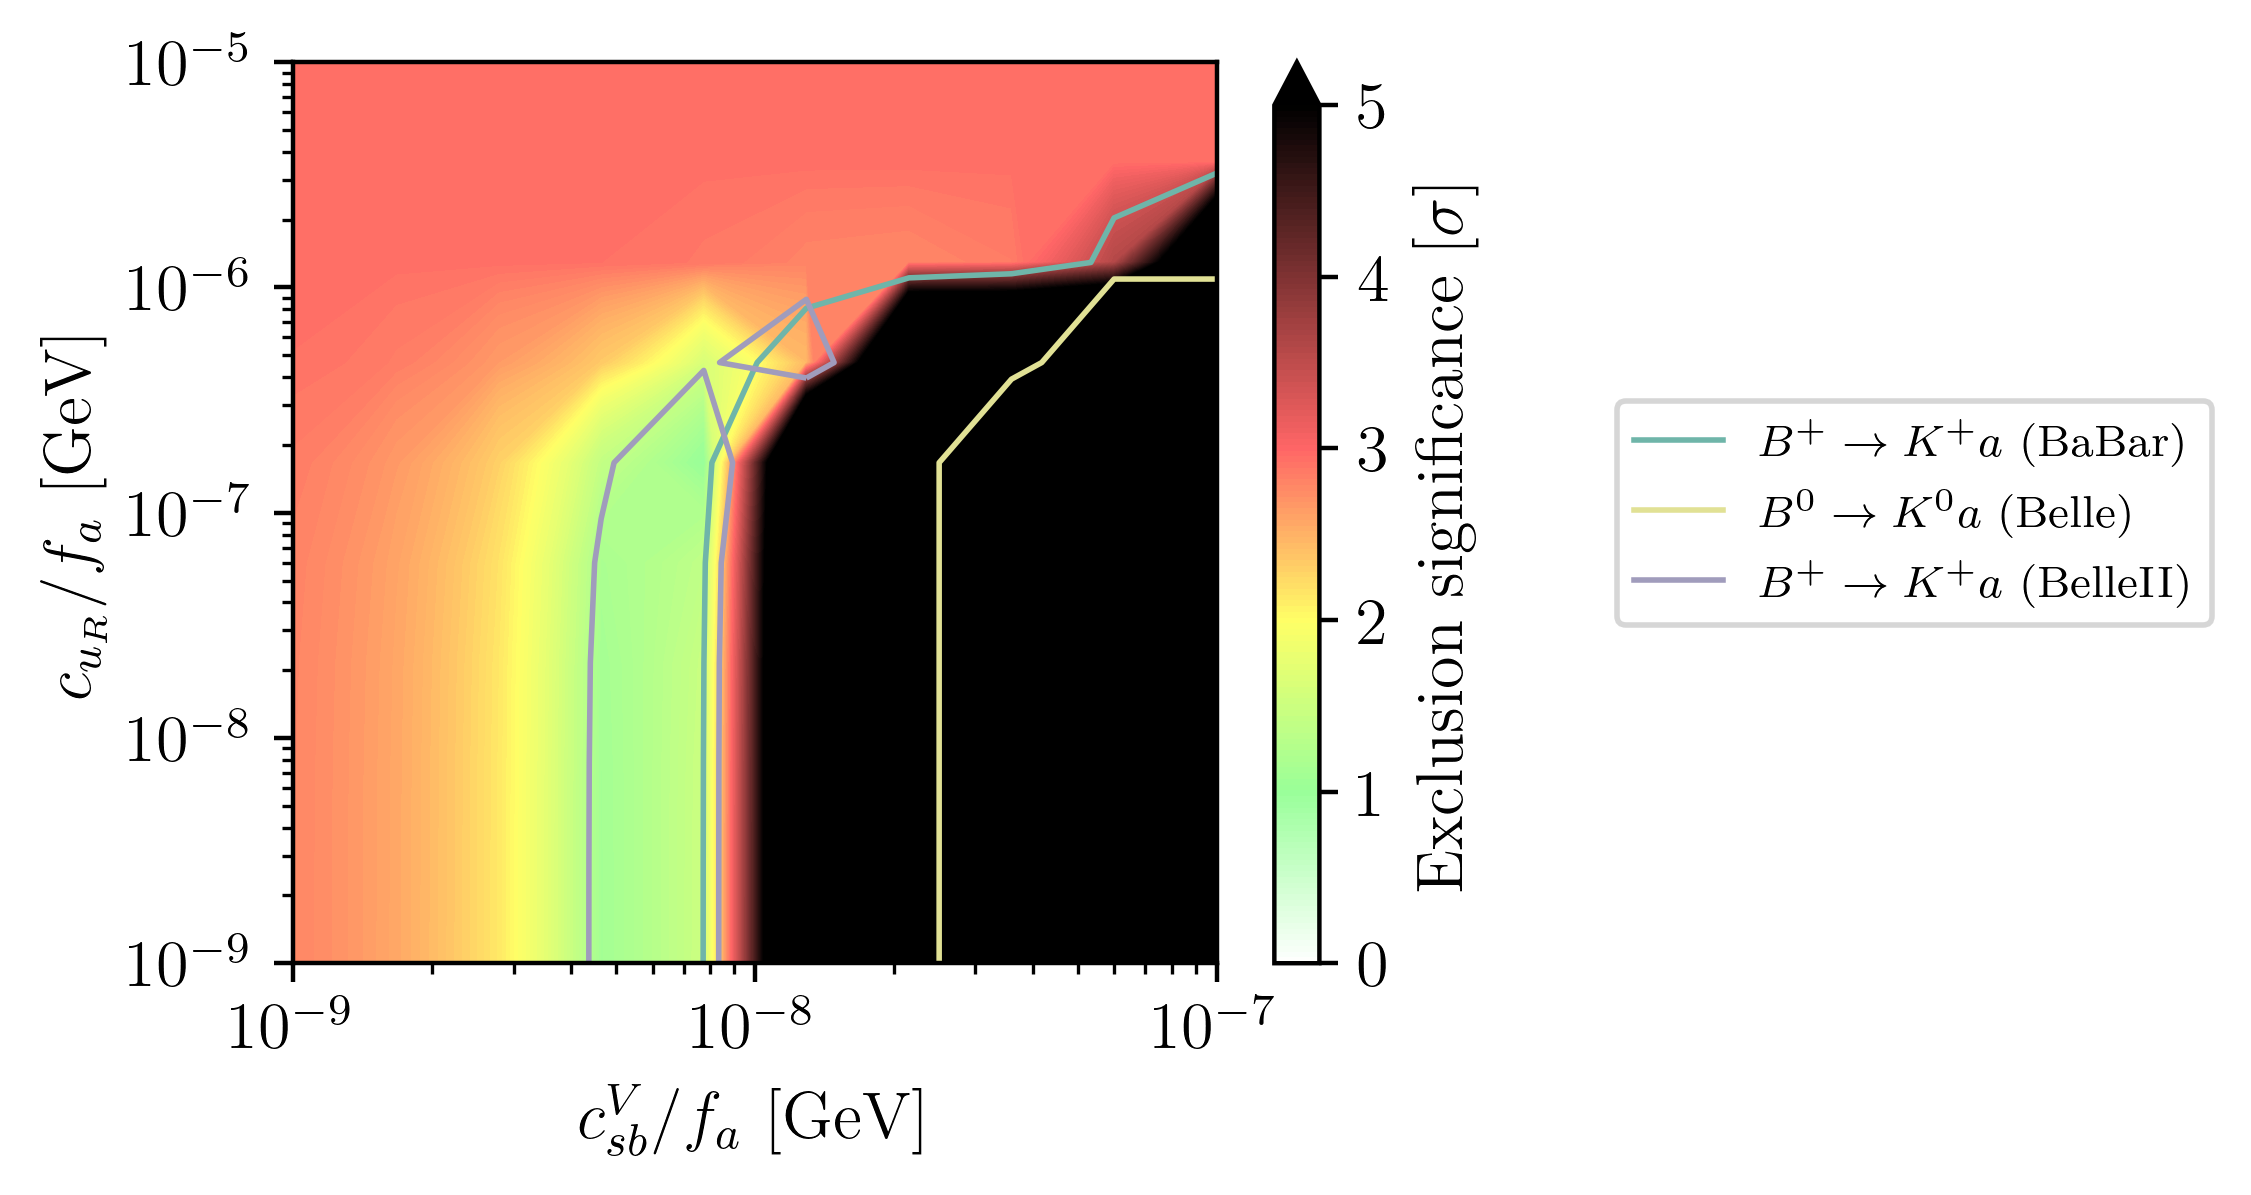

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(cbsV_grid/fa, ct_grid/fa, chi2_ct_BK_meas, r'$c_{sb}^V/f_a$ [GeV]', r'$c_{u_R}/f_a$ [GeV]', ax=ax)
fig.savefig('ALP_BK_ct.pdf', bbox_inches='tight')

### Parameters at low energy


In [11]:
ma = 2
fa_cg = 1e5

cgamma_vec = np.logspace(-3,0 , 50)
cbsV_vec= np.logspace(-4, -2, 50)

cbsV_grid, cgamma_grid = np.meshgrid(cbsV_vec, cgamma_vec)

# Flatten the meshgrid arrays
ccgamma_flat = cgamma_grid.flatten()
cbsV_flat = cbsV_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for ccgamma_val, cbsV_val in zip(ccgamma_flat, cbsV_flat):
    coupling = ALPcouplings({'cg': ccgamma_val, 'cdV': np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=5.1, basis='VA_below')
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cgamma = np.array(couplings_list).reshape(cgamma_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cgamma_grid.shape, fa_cg)
ma_grid = np.full(cgamma_grid.shape, ma)

In [12]:
chi2_cgamma = get_chi2(default_sectors['bsa_lfu'], ma_grid, couplings_cgamma, fa_grid, integrator='no_rge', min_probability=0)
chi2_cgamma_meas=chi2_cgamma[0].split_measurements()

In [15]:
ma = 2
fa = 1e7

cmu_vec = np.logspace(-3,-1 , 50)
cbsV_vec= np.logspace(-2, 0, 50)

cbsV_grid_mu, cmu_grid = np.meshgrid(cbsV_vec, cmu_vec)

# Flatten the meshgrid arrays
ccmu_flat = cmu_grid.flatten()
cbsV_flat = cbsV_grid_mu.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for ccmu_val, cbsV_val in zip(ccmu_flat, cbsV_flat):
    coupling = ALPcouplings({'ceA': np.diag([0,ccmu_val,0]), 'cdV': np.array([[0,0,0],[0,0,cbsV_val],[0,cbsV_val,0]])}, scale=5.1, basis='VA_below')
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cmuons= np.array(couplings_list).reshape(cmu_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cmu_grid.shape, fa)
ma_grid = np.full(cmu_grid.shape, ma)

In [3]:
chi2_cmuons= get_chi2(default_sectors['bsa_lfu'], ma_grid, couplings_cmuons, fa_grid, integrator='no_rge', min_probability=0)
chi2_cmuons_meas=chi2_cmuons[0].split_measurements()


In [13]:
for c in chi2_cmuons_meas:
    if c.sector.name == 'B+ -> K+ muon muon @ CHARM':
        c.set_plot_style(color="#d62728",lw=5)
    if c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#9bb333",lw=5)
    if c.sector.name == 'B0 -> K0 alp @ Belle':
        c.set_plot_style(color="#821e99",lw=5)
    if c.sector.name == 'B+ -> K+ alp @ BaBar':
        c.set_plot_style(color="#3650c4",lw=5)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=5)
    else:
        c.set_plot_style(lw=5)
    
for c in chi2_cgamma_meas:
    if c.sector.name == 'B0 -> K0 alp @ Belle':
        c.set_plot_style(color="#821e99",lw=5)
    if c.sector.name == 'B+ -> K+ alp @ BaBar':
        c.set_plot_style(color="#3650c4",lw=5)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=5)
    else:
        c.set_plot_style(lw=5)



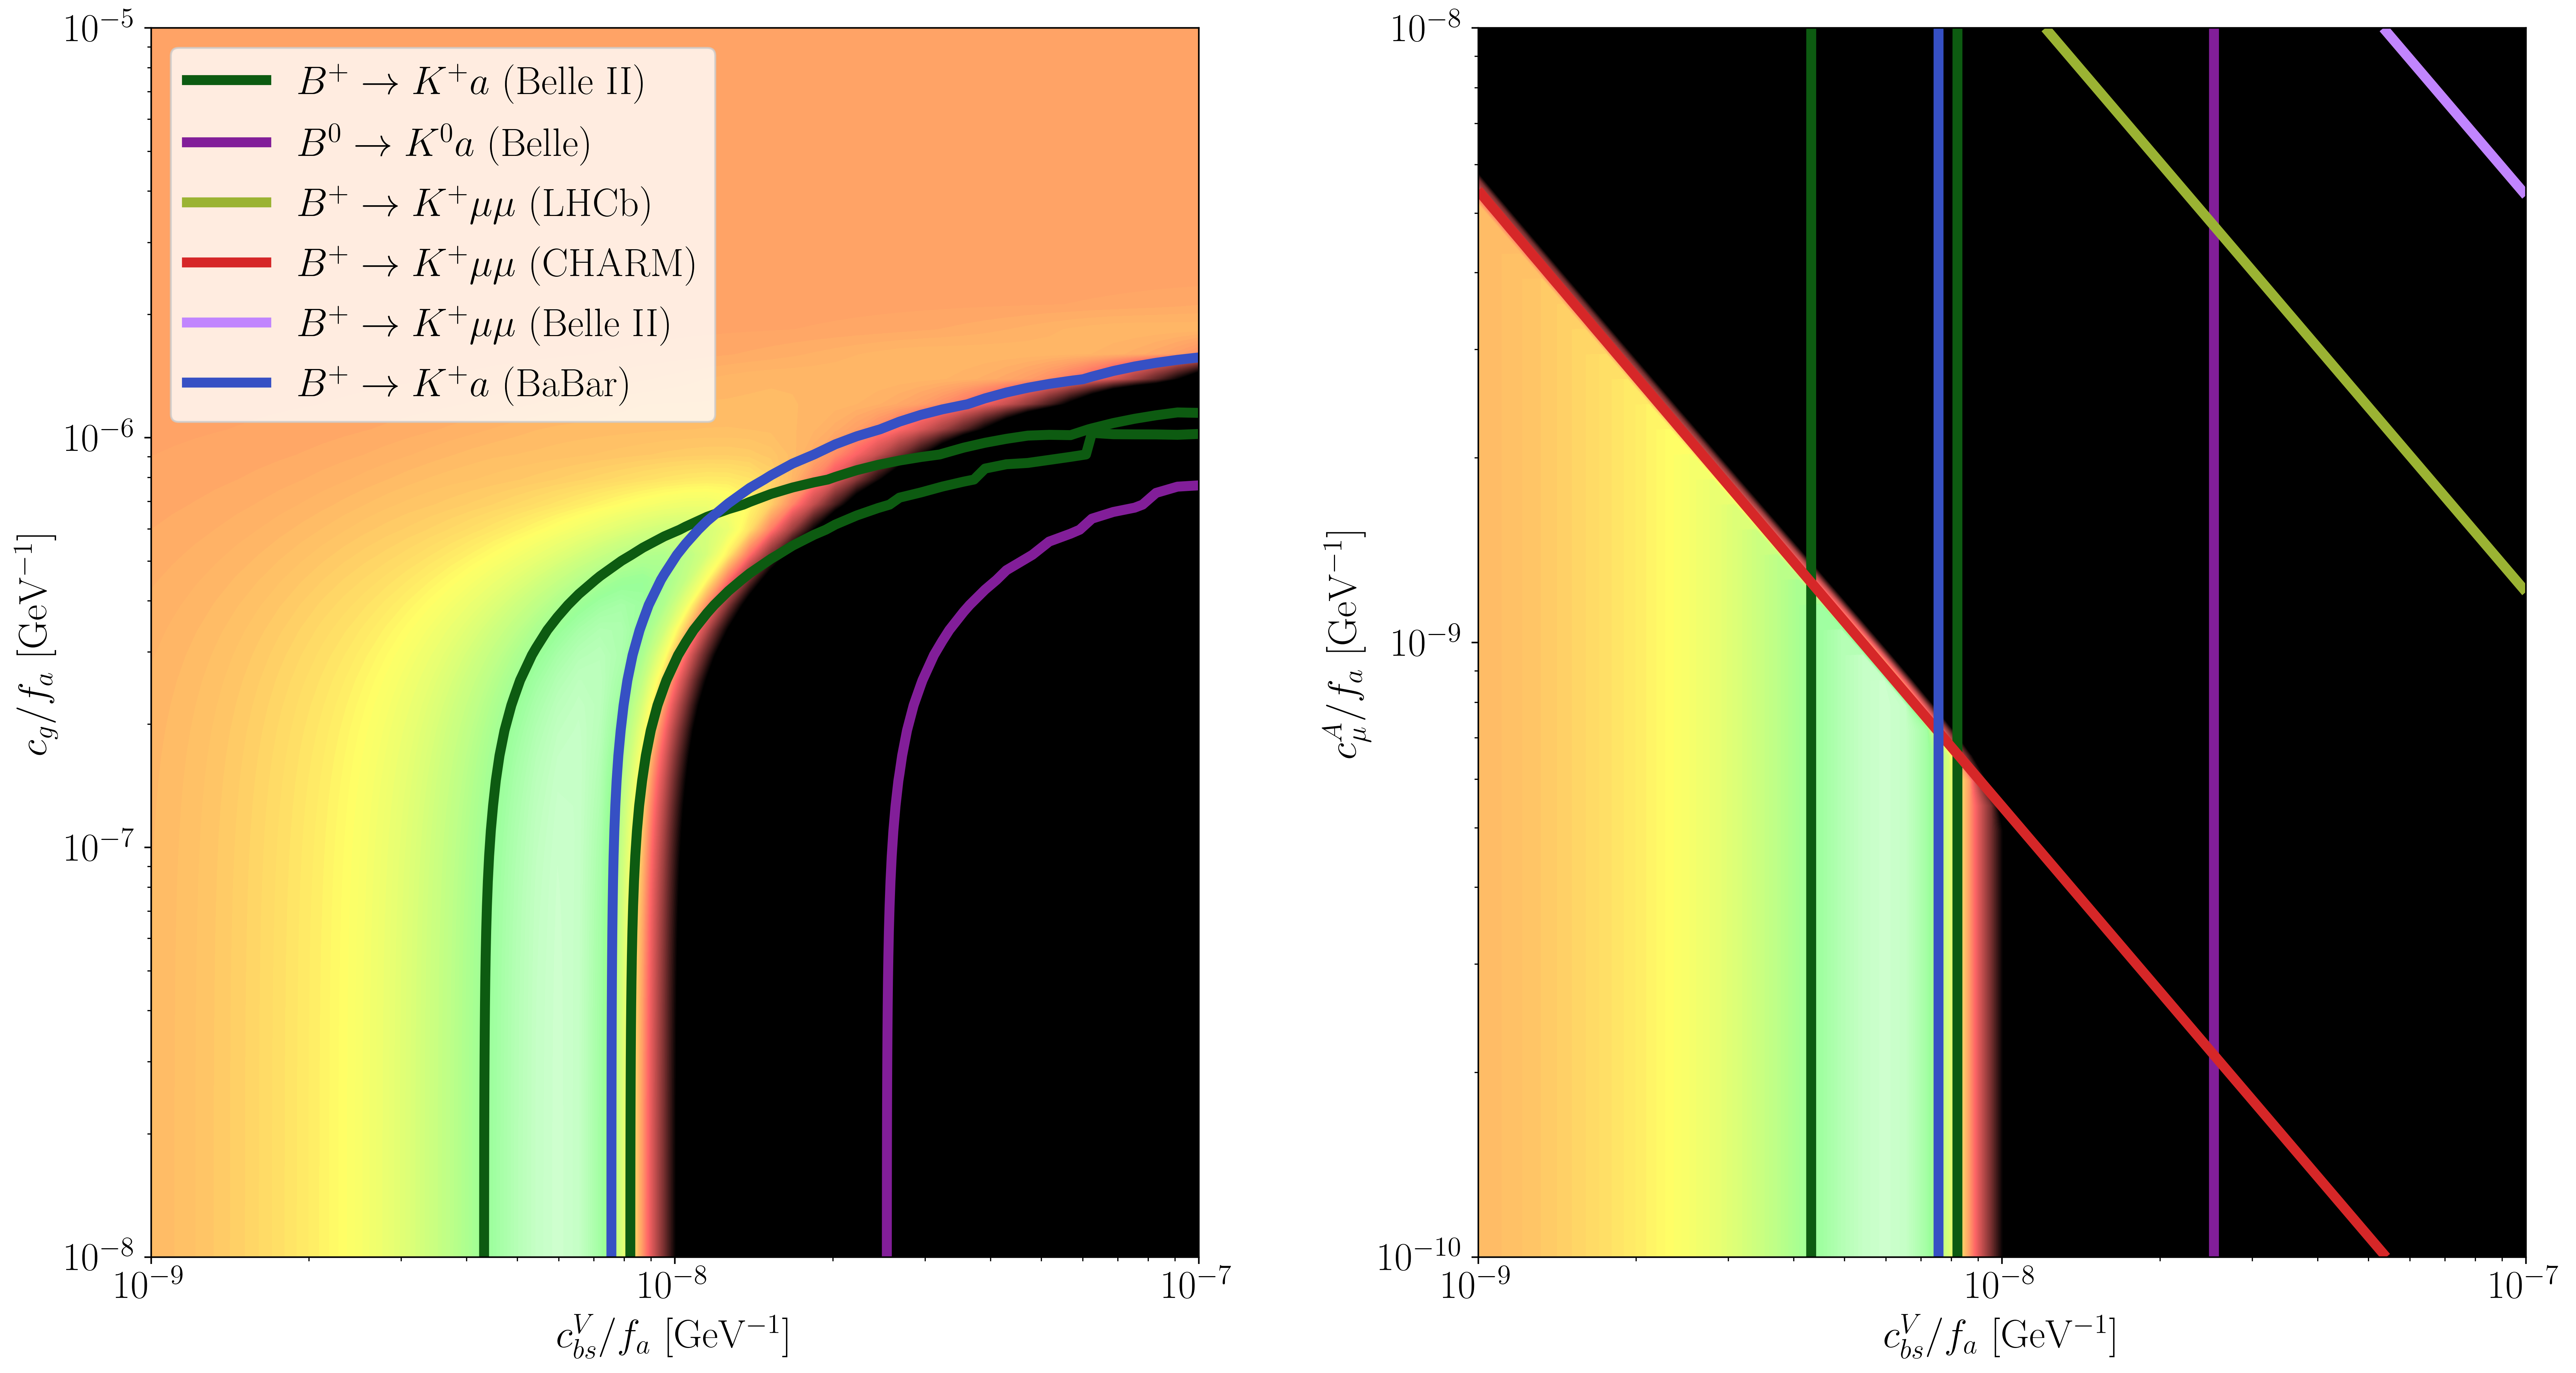

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=400)

ax1=exclusionplot(cbsV_grid/fa_cg, cgamma_grid/fa_cg, chi2_cgamma_meas, r'$c_{bs}^V/f_a$ [GeV$^{-1}$]', r'$c_{g}/f_a$ [GeV$^{-1}$]', ax=axs[0])
ax2=exclusionplot(cbsV_grid_mu/fa, cmu_grid/fa, chi2_cmuons_meas, r'$c_{bs}^V/f_a$ [GeV$^{-1}$]', r'$c_{\mu}^A/f_a$ [GeV$^{-1}$]', ax=axs[1])


# ax1.get_legend().remove()
ax1.get_legend().remove()
leyenda = ax2.get_legend()
# Move legend from ax2 to ax1
handles, labels = leyenda.legend_handles, [t.get_text() for t in leyenda.texts]
ax1.legend(handles, labels, loc=2)
ax2.get_legend().remove()
fig.axes[2].set_visible(False)
fig.axes[3].set_visible(False)
fig.tight_layout()
fig.savefig('ALP_BK_muons_gluons.pdf', bbox_inches='tight')

In [ ]:
ma = 2

tanb = np.logspace(np.log10(0.2), 1, 30)
fa_vec= np.logspace(6, 8, 30)

fa_grid, tanb_grid = np.meshgrid(fa_vec, tanb)

# Flatten the meshgrid arrays
fa_flat = fa_grid.flatten()
tanb_flat = tanb_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for fa_val, tanb_val in zip(fa_flat, tanb_flat):
    sinb2= tanb_val**2/(1+tanb_val**2)
    cosb2= 1-sinb2
    coupling = alpaca.ALPcouplings({'cg': -1/2, 'cW': -1, 'cB': 4/3, 'cdR': cosb2, 'cuR': sinb2, 'ceR': cosb2, 'cqL': np.diag([0,0,1]), 'clL': np.diag([0,0,-1])}, scale=fa_val, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_2HDM1 = np.array(couplings_list).reshape(fa_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
ma_grid = np.full(fa_grid.shape, ma)

KeyboardInterrupt: 

In [ ]:
chi2_2HDM1 = alpaca.statistics.get_chi2(alpaca.sectors.default_sectors['bsa_lfu'],
ma_grid, couplings_2HDM1, fa_grid, integrator='no_rge', min_probability=0)


In [ ]:
chi2_2HDM1_proj = alpaca.statistics.get_chi2(alpaca.sectors.default_sectors['bsa_lfu'],
ma_grid, couplings_2HDM1, fa_grid, integrator='no_rge', min_probability=0, exclude_projections=False)

In [ ]:
chi2_obs = chi2_2HDM1[0].split_observables()
chi2_meas = chi2_2HDM1_proj[0].split_measurements()
chi2_ship = [c for c in chi2_meas if 'SHiP' in c.sector.name]

In [ ]:
for c in chi2_obs:
    c.set_plot_style(lw=2.5)
    
for c in chi2_ship:
    c.set_plot_style(color="#747474", ls='--')

In [ ]:
chi2_obs_ord = [c for c in chi2_obs if c.sector.contains_observable('B+ -> K+ a')] + [c for c in chi2_obs if c.sector.contains_observable('B+ -> K*+ a')] + [c for c in chi2_obs if c.sector.contains_observable('B+ -> K+ mu mu')] + chi2_ship

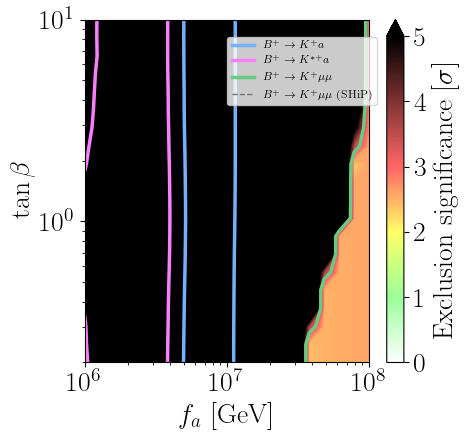

In [ ]:

ax = exclusionplot(fa_grid, tanb_grid, chi2_obs_ord, r'$f_a$ [GeV]', r'$\tan\beta$', global_chi2=chi2_2HDM1[0])
ax.get_legend().set_bbox_to_anchor((0.15, 0.35, 1.0, 1.0))

plt.savefig('2HDM.pdf', bbox_inches='tight')


In [ ]:
chi2_meas

|Index|Sector|
| :-: | :- |
|0|$$B^+ \to K^+ \gamma \gamma \ \mathrm{(BaBar)}$$|
|1|$$B_s^0 \to \gamma \gamma \ \mathrm{(Belle)}$$|
|2|$$B^0 \to K^{*0} \tau \tau \ \mathrm{(Belle)}$$|
|3|$$B_s^0 \to \tau \tau \ \mathrm{(LHCb\ HL-LHC)}$$|
|4|$$B_s^0 \to \mu \mu \ \mathrm{(CMS\ HL-LHC)}$$|
|5|$$B^+ \to K^+ \mu \mu \ \mathrm{(CHARM)}$$|
|6|$$B^+ \to K^+ \eta \pi^+ \pi^- \ \mathrm{(BaBar)}$$|
|7|$$B_s^0 \to e e \ \mathrm{(LHCb)}$$|
|8|$$B^+ \to K^+ \pi^+ \pi^- \pi^0 \ \mathrm{(Belle)}$$|
|9|$$B^+ \to K^+ e e \ \mathrm{(Belle\ II)}$$|
|10|$$B_s^0 \to \mu \mu \ \mathrm{(LHCb)}$$|
|11|$$B^+ \to K^+ \mu \mu \ \mathrm{(LHCb)}$$|
|12|$$B^+ \to K^+ \mu \mu \ \mathrm{(NA62)}$$|
|13|$$B^0 \to K^{*0} \tau \tau \ \mathrm{(Belle\ II\ 50ab-1)}$$|
|14|$$B^+ \to K^+ \mu \mu \ \mathrm{(Belle\ II)}$$|
|15|$$B_s^0 \to \tau \tau \ \mathrm{(Belle\ II\ 5ab-1)}$$|
|16|$$B^0 \to K^0 \pi^+ \pi^- \pi^0 \ \mathrm{(Belle)}$$|
|17|$$B^+ \to K^+ \tau \tau \ \mathrm{(Belle\ II\ 50ab-1)}$$|
|18|$$B^0 \to K^{*0} \mu \mu \ \mathrm{(LHCb)}$$|
|19|$$B^+ \to K^{*+} a \ \mathrm{(BaBar)}$$|
|20|$$B^+ \to K^+ a \ \mathrm{(Belle\ II)}$$|
|21|$$B^+ \to K^+ \tau \tau \ \mathrm{(BaBar)}$$|
|22|$$B_s^0 \to \mu \mu \ \mathrm{(CMS)}$$|
|23|$$B_s^0 \to \mu \mu \ \mathrm{(ATLAS\ HL-LHC)}$$|
|24|$$B^0 \to K^{*0} \mu \mu \ \mathrm{(Belle\ II)}$$|
|25|$$B^0 \to K^0 a \ \mathrm{(Belle)}$$|
|26|$$B_s^0 \to a \phi \ \mathrm{(DELPHI)}$$|
|27|$$B_s^0 \to \tau \tau \ \mathrm{(LHCb)}$$|
|28|$$B^+ \to K^+ \mu \mu \ \mathrm{(SHiP)}$$|
|29|$$B_s^0 \to \mu \mu \ \mathrm{(LHCb\ HL-LHC)}$$|
|30|$$B^0 \to K^{*0} e e \ \mathrm{(Belle\ II)}$$|
|31|$$B^+ \to K^+ a \ \mathrm{(BaBar)}$$|

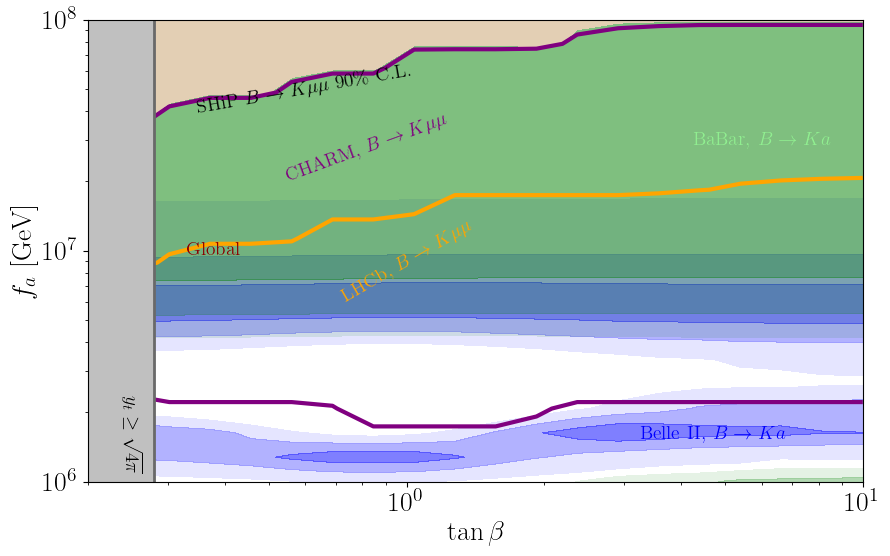

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contourf(tanb_grid, fa_grid,(chi2_meas[20].significance()), levels=[0,1,2, 3], colors='Blue', alpha=[0.5,0.3,0.1],zorder=0.1)
ax.contourf(tanb_grid, fa_grid,(chi2_meas[31].significance()), levels=[0,1,2,3], colors='Green', alpha=[0.5,0.3,0.1],zorder=0.1)
# ax.contour(tanb_grid, fa_grid,(chi2_meas[24].significance()), levels=[1,2,3], colors='Green', linestyles='dashed',zorder=0.1)

ax.contourf(tanb_grid,fa_grid,  (chi2_2HDM1[0].significance()), levels=[0,1,2, 3], cmap='Reds_r', alpha=0.8,zorder=0.1)

ax.contour(tanb_grid,fa_grid, (chi2_meas[5].significance()), levels=[2], linewidths=3, colors='purple',zorder=0.1)
ax.contour(tanb_grid,fa_grid, (chi2_meas[11].significance()), levels=[2], linewidths=3, colors='orange',zorder=0.1)
# ax.contour(tanb_grid,fa_grid, (chi2_meas[11].significance()), levels=[2], linewidths=3, colors='pink',zorder=0.1)
ax.contour(tanb_grid,fa_grid, (chi2_obs_ord[3].significance()), levels=[2],linestyles='dashed', colors='black')

# Swap x and y axes for all plot elements

ax.fill_betweenx([ 1e6, 1e8],0.1, 0.28, color='silver', alpha=1, label=r'$y_t\leq \sqrt{4\pi}$')
ax.vlines(0.28, 1e6, 1e8, color='dimgray', linewidth=2)
ax.text(0.25, 1.6e6, r'$y_t\geq \sqrt{4\pi} $', fontsize=14, color='black', ha='center', va='center', rotation=-90)
ax.text(4.7, 1.6e6, r'Belle II, $B\to K a$', fontsize=14, color='blue', ha='center', va='center', rotation=0)
ax.text(6, 3e7, r'BaBar, $B\to K a$', fontsize=14, color='lightgreen', ha='center', va='center')
ax.text(0.6, 5e7, r'SHiP $B\to K \mu\mu$ $90\%$ C.L.', fontsize=14, color='black', ha='center', va='center', rotation=10)
ax.text(1, 0.9e7, r'LHCb, $B\to K \mu\mu$', fontsize=14, color='orange', ha='center', va='center', rotation=30)
ax.text(0.82, 2.8e7, r'CHARM, $B\to K \mu\mu$', fontsize=14, color='purple', ha='center', va='center', rotation=20)
ax.text(0.38, 1e7, r'Global', fontsize=14, color='darkred', ha='center', va='center')

ax.set_xlim(0.2, 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e6, 1e8)
ax.set_ylabel(r'$f_a$ [GeV]')
ax.set_xlabel(r'$\tan\beta$')
fig.savefig('2HDM_model_fit_V2.pdf', bbox_inches='tight')

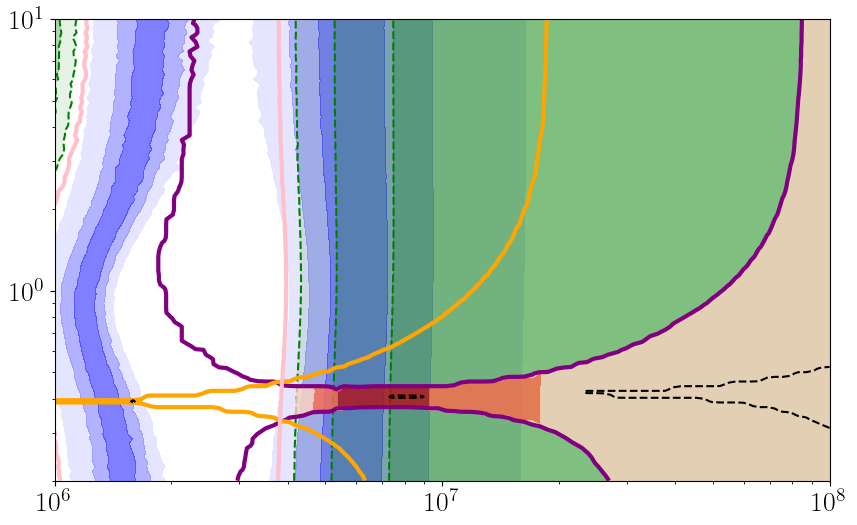

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contourf( fa_grid,tanb_grid,(chi2_meas[0].significance()), levels=[0,1,2, 3], colors='Blue', alpha=[0.5,0.3,0.1],zorder=0.1)
ax.contourf(fa_grid,tanb_grid,(chi2_meas[24].significance()), levels=[0,1,2,3], colors='Green', alpha=[0.5,0.3,0.1],zorder=0.1)
ax.contour(fa_grid,tanb_grid,(chi2_meas[24].significance()), levels=[1,2,3], colors='Green', linestyles='dashed',zorder=0.1)

ax.contourf(fa_grid, tanb_grid, (chi2_2HDM1[0].significance()), levels=[0,1,2, 3], cmap='Reds_r', alpha=0.8,zorder=0.1)

ax.contour(fa_grid,tanb_grid, (chi2_meas[10].significance()), levels=[2], linewidths=3, colors='purple',zorder=0.1)
ax.contour(fa_grid,tanb_grid, (chi2_meas[8].significance()), levels=[2], linewidths=3, colors='orange',zorder=0.1)
ax.contour(fa_grid,tanb_grid, (chi2_meas[11].significance()), levels=[2], linewidths=3, colors='pink',zorder=0.1)
ax.contour(fa_grid,tanb_grid, (chi2_obs_ord[3].significance()), levels=[2],linestyles='dashed', colors='black')
ax.set_xscale('log')
ax.set_yscale('log')

In [36]:
chi2_2HDM1_proj.split_measurements()

|Index|Sector|
| :-: | :- |
|0|$$B^+ \to K^+ a \ \mathrm{(Belle\ II)}$$|
|1|$$B^0 \to K^{*0} \tau \tau \ \mathrm{(Belle\ II\ 50ab-1)}$$|
|2|$$B^0 \to K^0 \pi^+ \pi^- \pi^0 \ \mathrm{(Belle)}$$|
|3|$$B^+ \to K^+ \tau \tau \ \mathrm{(Belle\ II\ 50ab-1)}$$|
|4|$$B_s^0 \to \mu \mu \ \mathrm{(LHCb\ HL-LHC)}$$|
|5|$$B^0 \to K^0 a \ \mathrm{(Belle)}$$|
|6|$$B_s^0 \to e e \ \mathrm{(LHCb)}$$|
|7|$$B^0 \to K^{*0} \mu \mu \ \mathrm{(LHCb)}$$|
|8|$$B^+ \to K^+ \mu \mu \ \mathrm{(LHCb)}$$|
|9|$$B^0 \to K^{*0} e e \ \mathrm{(Belle\ II)}$$|
|10|$$B^+ \to K^+ \mu \mu \ \mathrm{(CHARM)}$$|
|11|$$B^+ \to K^{*+} a \ \mathrm{(BaBar)}$$|
|12|$$B_s^0 \to \mu \mu \ \mathrm{(LHCb)}$$|
|13|$$B_s^0 \to \mu \mu \ \mathrm{(CMS)}$$|
|14|$$B^+ \to K^+ \tau \tau \ \mathrm{(BaBar)}$$|
|15|$$B^0 \to K^{*0} \mu \mu \ \mathrm{(Belle\ II)}$$|
|16|$$B^+ \to K^+ \mu \mu \ \mathrm{(Belle\ II)}$$|
|17|$$B_s^0 \to \tau \tau \ \mathrm{(LHCb\ HL-LHC)}$$|
|18|$$B_s^0 \to \gamma \gamma \ \mathrm{(Belle)}$$|
|19|$$B^+ \to K^+ e e \ \mathrm{(Belle\ II)}$$|
|20|$$B_s^0 \to a \phi \ \mathrm{(DELPHI)}$$|
|21|$$B^+ \to K^+ \mu \mu \ \mathrm{(SHiP)}$$|
|22|$$B^+ \to K^+ \eta \pi^+ \pi^- \ \mathrm{(BaBar)}$$|
|23|$$B^0 \to K^{*0} \tau \tau \ \mathrm{(Belle)}$$|
|24|$$B^+ \to K^+ a \ \mathrm{(BaBar)}$$|
|25|$$B_s^0 \to \tau \tau \ \mathrm{(Belle\ II\ 5ab-1)}$$|
|26|$$B_s^0 \to \mu \mu \ \mathrm{(ATLAS\ HL-LHC)}$$|
|27|$$B_s^0 \to \tau \tau \ \mathrm{(LHCb)}$$|
|28|$$B^+ \to K^+ \mu \mu \ \mathrm{(NA62)}$$|
|29|$$B_s^0 \to \mu \mu \ \mathrm{(CMS\ HL-LHC)}$$|
|30|$$B^+ \to K^+ \gamma \gamma \ \mathrm{(BaBar)}$$|
|31|$$B^+ \to K^+ \pi^+ \pi^- \pi^0 \ \mathrm{(Belle)}$$|

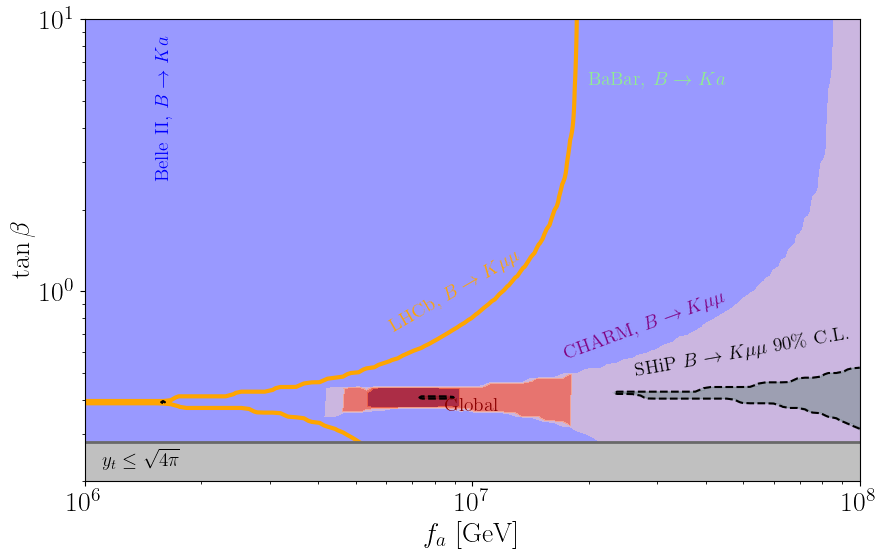

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.contourf(fa_grid, tanb_grid, np.nan_to_num(chi2_meas[21].significance()), levels=[0,1,2,3], colors='Green', alpha=[0.6,0.4,0.2],zorder=0.1)
ax.contourf(fa_grid, tanb_grid, np.nan_to_num(chi2_meas[12].significance()), levels=[0,1,2,3], colors='Blue', alpha=[0.6,0.4,0.2],zorder=0.1)
ax.contourf(fa_grid, tanb_grid, np.nan_to_num(chi2_2HDM1[0].significance()), levels=[0,1,2,3], cmap='Reds_r', alpha=[0.8,0.8,0.5],zorder=0.1)
ax.contour(fa_grid, tanb_grid, np.nan_to_num(chi2_meas[25].significance()), levels=[2], linewidths=3, colors='purple',zorder=0.1)
ax.contour(fa_grid, tanb_grid, np.nan_to_num(chi2_meas[8].significance()), levels=[2], linewidths=3, colors='orange',zorder=0.1)
ax.contour(fa_grid, tanb_grid, np.nan_to_num(chi2_obs_ord[3].significance()), levels=[2],linestyles='dashed', colors='black')
ax.fill_betweenx([0.1, 0.28], 1e6, 1e8, color='silver', alpha=1, label=r'$y_t\leq \sqrt{4\pi}$')
ax.hlines(0.28, 1e6, 1e8, color='dimgray', linewidth=2)
ax.text(1.4e6, 0.24, r'$y_t\leq \sqrt{4\pi} $', fontsize=14, color='black', ha='center', va='center')
ax.text(1.6e6, 4.7, r'Belle II, $B\to K a$', fontsize=14, color='blue', ha='center', va='center', rotation= 90)
ax.text(3e7, 6, r'BaBar, $B\to K a$', fontsize=14, color='lightgreen', ha='center', va='center')
ax.text(5e7, 0.6, r'SHiP $B\to K \mu\mu$ $90\%$ C.L.', fontsize=14, color='black', ha='center', va='center', rotation=10)
ax.text(0.9e7, 1, r'LHCb, $B\to K \mu\mu$', fontsize=14, color='orange', ha='center', va='center', rotation=30)
ax.text(2.8e7, 0.75, r'CHARM, $B\to K \mu\mu$', fontsize=14, color='purple', ha='center', va='center', rotation=20)
ax.text(1e7, 0.38, r'Global', fontsize=14, color='darkred', ha='center', va='center')
ax.set_ylim(0.2, 10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$f_a$ [GeV]')
ax.set_ylabel(r'$\tan\beta$')
fig.savefig('2HDM_model_fit.pdf', bbox_inches='tight')

In [331]:
counter = 0
for c in chi2_meas:
    print(counter, c.name)
    counter += 1

0 B+ -> K+ eta pion+ pion- @ BaBar
1 B+ -> K*+ electron muon @ BaBar
2 B+ -> K+ electron tau @ BaBar
3 B+ -> K+ pion+ pion- pion0 @ Belle
4 B0 -> K*0 tau tau @ Belle
5 B0 -> K0 electron muon @ BaBar
6 B0 -> K0 alp @ Belle
7 B+ -> K+ muon muon @ SHiP
8 B+ -> K+ muon muon @ LHCb
9 B+ -> K+ photon photon @ BaBar
10 B0 -> K*0 muon muon @ LHCb
11 B+ -> K+ electron electron @ Belle II
12 B+ -> K+ alp @ Belle II
13 B0 -> K*0 muon tau @ LHCb
14 B0 -> K*0 electron muon @ BaBar
15 B0 -> K*0 electron electron @ Belle II
16 B+ -> K*+ alp @ BaBar
17 B0 -> K*0 muon muon @ Belle II
18 B+ -> K+ muon muon @ Belle II
19 B+ -> K+ tau tau @ BaBar
20 B0 -> K0 pion+ pion- pion0 @ Belle
21 B+ -> K+ alp @ BaBar
22 B+ -> K+ muon muon @ NA62
23 B+ -> K+ electron muon @ BaBar
24 B+ -> K+ muon tau @ BaBar
25 B+ -> K+ muon muon @ CHARM


In [223]:

ma = 2

tanb = np.logspace(-1, 2, 20)
fa_vec= np.logspace(6, 8, 20)

fa_grid, tanb_grid = np.meshgrid(fa_vec, tanb)

# Flatten the meshgrid arrays
fa_flat = fa_grid.flatten()
tanb_flat = tanb_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for fa_val, tanb_val in zip(fa_flat, tanb_flat):
    sinb2= tanb_val**2/(1+tanb_val**2)
    cosb2=1-sinb2
    coupling = ALPcouplings({'cg': 1/2, 'cB': 8, 'cdR': cosb2, 'cuR': sinb2, 'ceR': sinb2, 'cqL': np.diag([0,0,1]), 'clL': np.diag([0,0,1])}, scale=fa_val, basis='derivative_above').match_run(ma, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_2HDM1 = np.array(couplings_list).reshape(fa_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
ma_grid = np.full(fa_grid.shape, ma)


KeyboardInterrupt: 

In [72]:
chi2_2HDM1 = get_chi2(transitions, ma_grid, couplings_2HDM1, fa_grid, integrator='no_rge', min_probability=0)

# chi2_glob_2HDM1 = combine_chi2(*[v for k, v in chi2_2HDM1.items() if k not in [('B+ -> K+ a', 'BaBar + Belle II')]])
# chi2_final_2HDM1 = {k: v for k, v in chi2_2HDM1.items() if k not in [('B+ -> K+ a', 'BaBar + Belle II')]}
# chi2_final_2HDM1[('', 'Global')] = chi2_glob_2HDM1

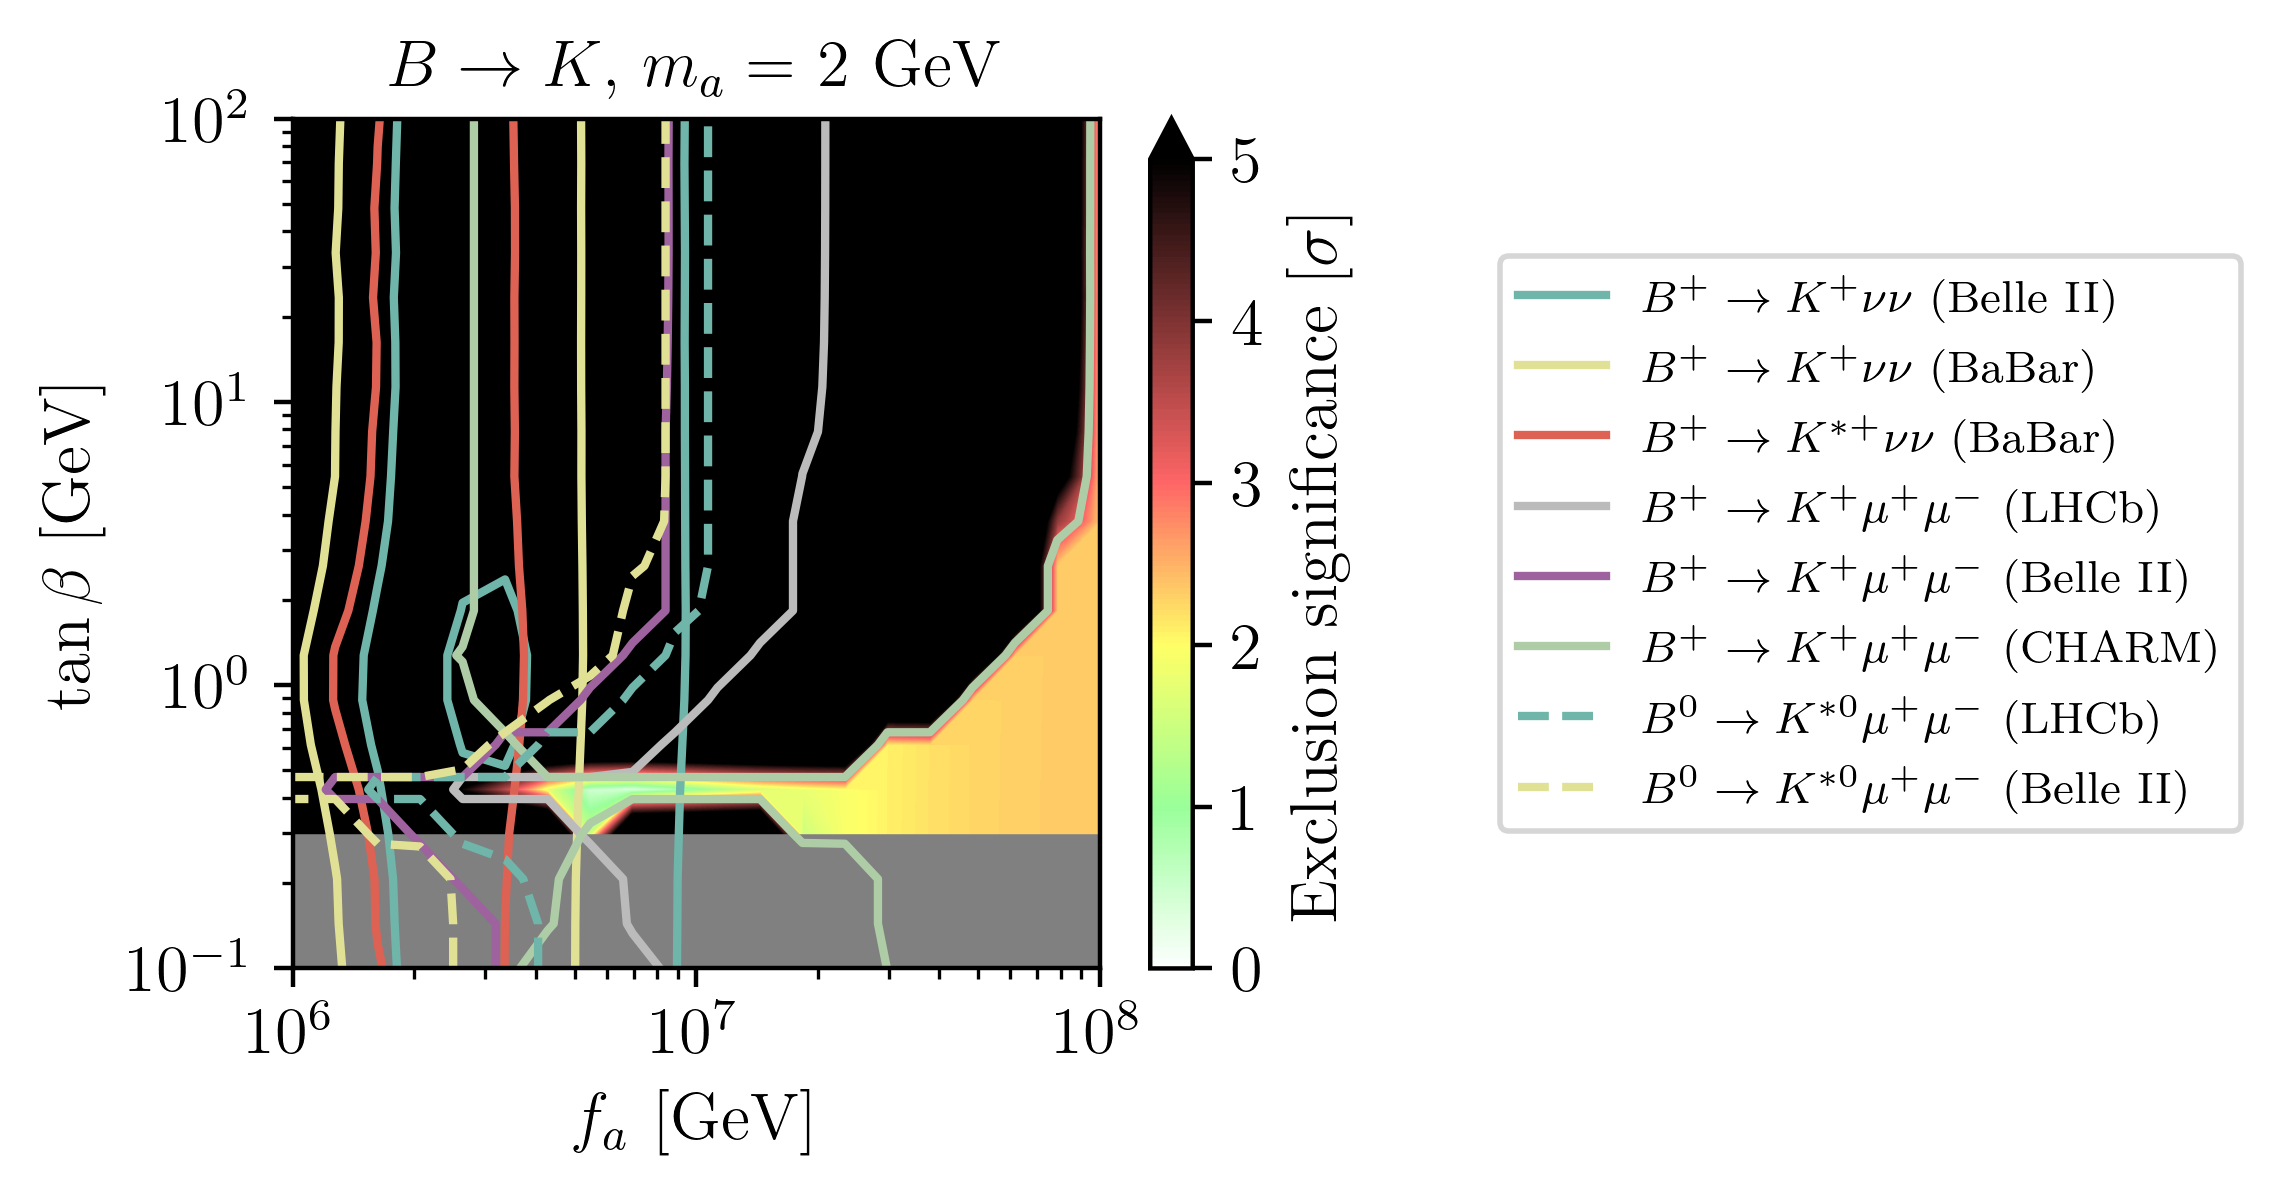

In [73]:
tex_label = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B+ -> K*+ a': r'$B^+ \to K^{*+} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'B0 -> pi0 mu mu': r'$B^0 \to \pi^0 \mu \mu$'}
legend_elements = []

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(fa_grid, tanb_grid, chi2_2HDM1, r'$f_a$ [GeV]', r'$\tan\beta$ [GeV]', rf'$B \to K$, $m_a=$ {ma} GeV',  tex=tex_label, ax=ax)

ax.fill_between(fa_vec,0.29, 0, color='gray', alpha=1, label=r'$y_{t}$ pert.')

In [147]:
ma = 2
fa_vec = np.logspace(4, 8, 40)
ct_vec = np.logspace(-2, 0, 40)

fa_grids, ct_grid = np.meshgrid(fa_vec, ct_vec)

# Flatten the meshgrid arrays
fa_flat = fa_grids.flatten()
ct_flat = ct_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for fa_vals, ct_val in zip(fa_flat, ct_flat):
    coupling = ALPcouplings({'cuR': np.diag([0,0,ct_val])}, scale=fa_vals, basis='derivative_above').match_run( ma, 'VA_below', 'leadinglog')
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_ct_fa = np.array(couplings_list).reshape(fa_grids.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid

ma_grid = np.full(couplings_ct_fa.shape, ma)


In [148]:
chi2_ctfa=get_chi2(default_sectors['all'], ma_grid, couplings_ct_fa, fa_grids, integrator='no_rge', min_probability=0)
chi2_ctf_meas = chi2_ctfa[0].split_measurements()

<Axes: xlabel='$f_a$ [GeV]', ylabel='$c_{t_R}/f_a$ [GeV$^{-1}$]'>

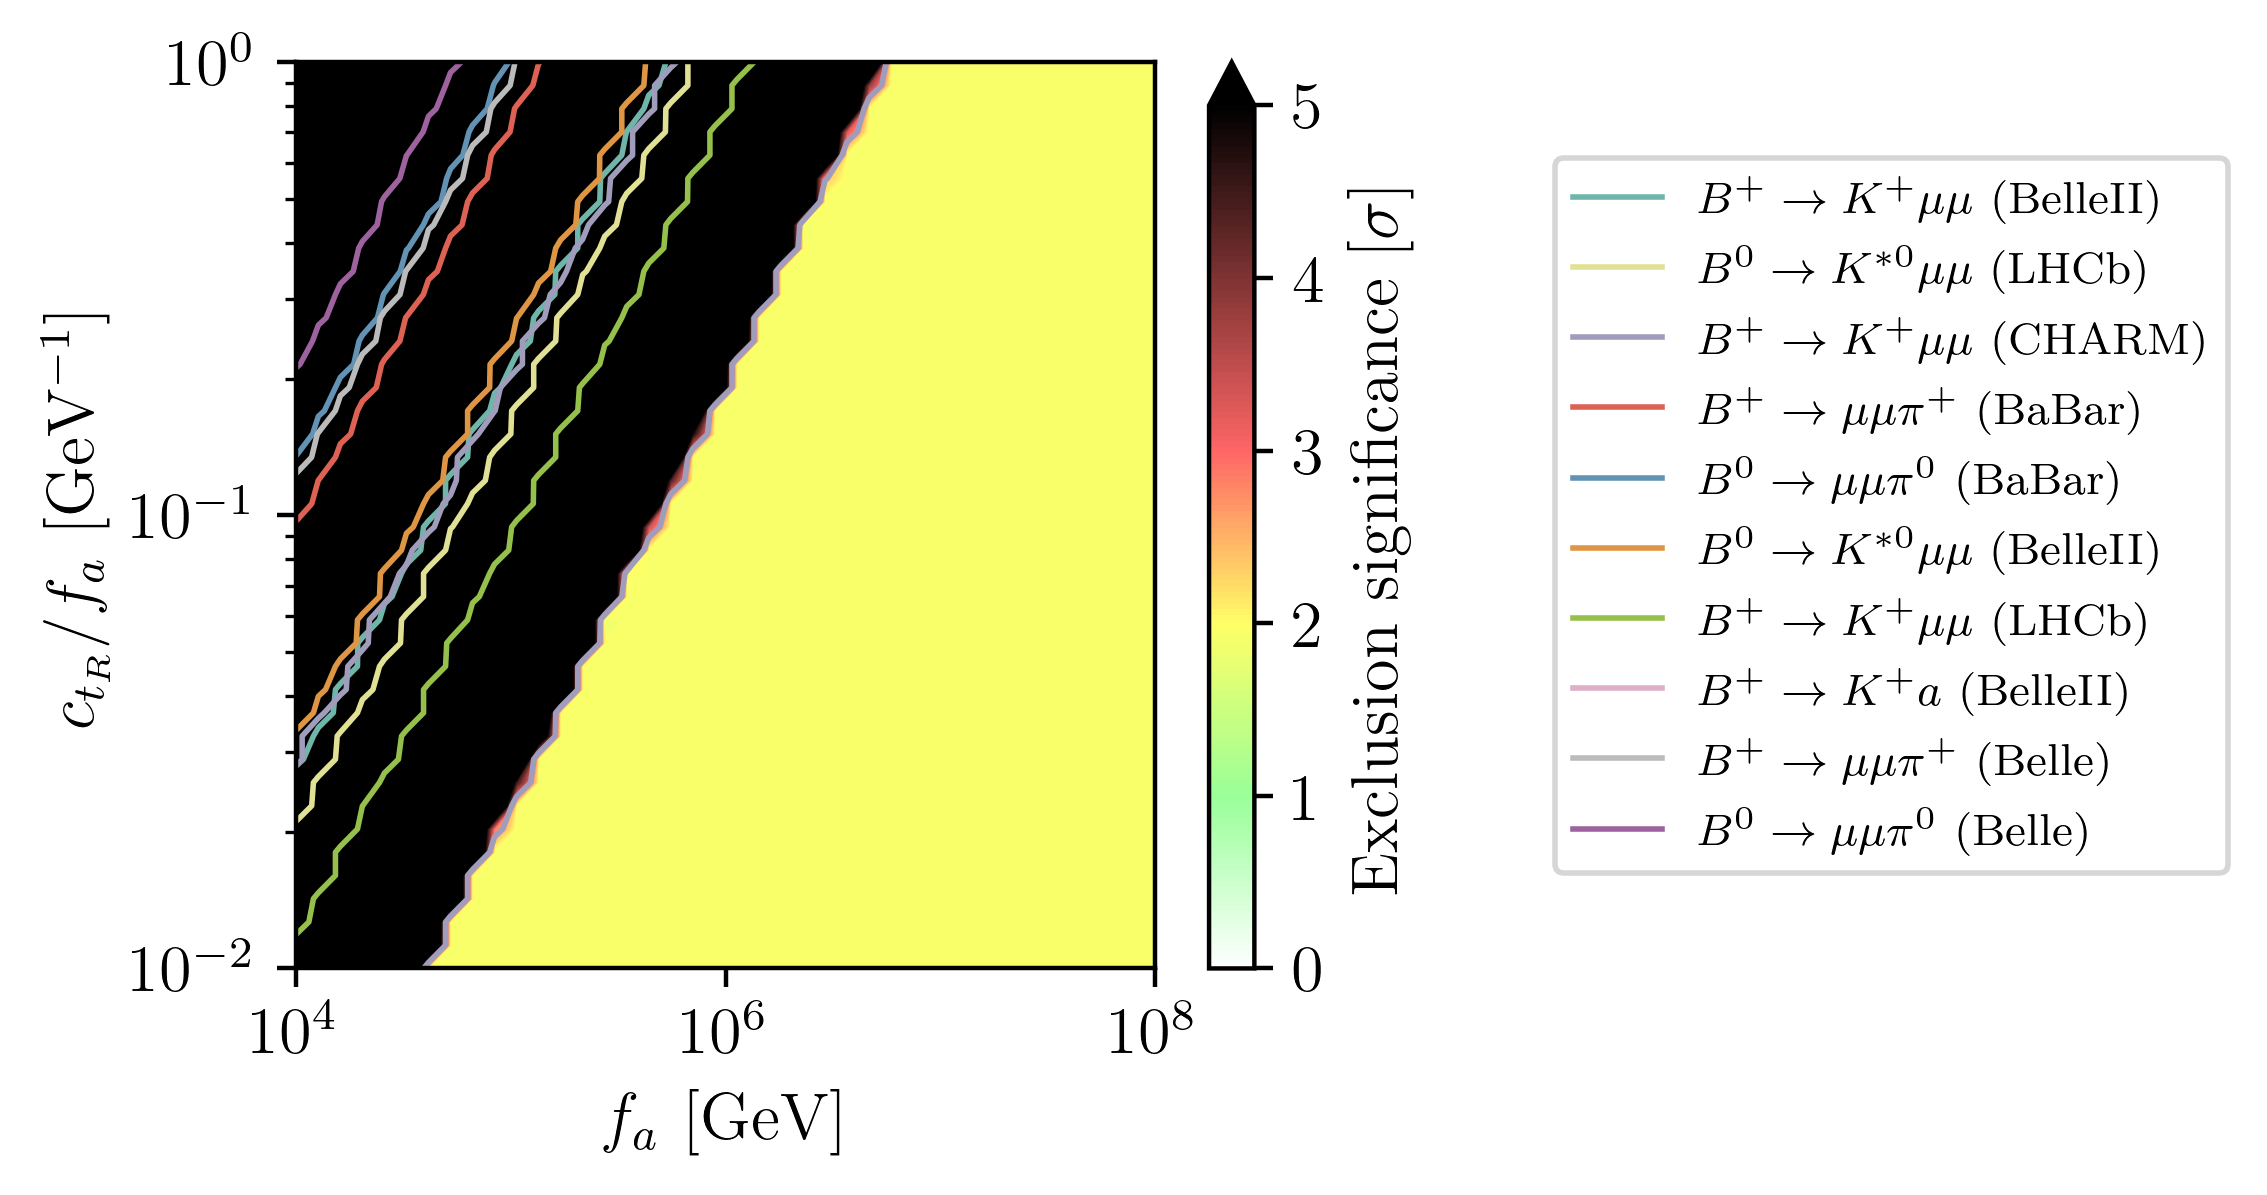

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(fa_grids, ct_grid, chi2_ctf_meas, r'$f_a$ [GeV]', r'$c_{t_R}/f_a$ [GeV$^{-1}$]', ax=ax)

In [ ]:
ma = 2
fa = 1e8

cbsL_vec = np.logspace(-2, 1, 20)
cbsR_vec= np.logspace(-2, 1, 20)

cbsL_grid, cbsR_grid = np.meshgrid(cbsL_vec, cbsR_vec)

# Flatten the meshgrid arrays
cbsL_flat = cbsL_grid.flatten()
cbsR_flat = cbsR_grid.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cbsL_val, cbsR_val in zip(cbsL_flat, cbsR_flat):
    coupling = ALPcouplings({'cqL':([[0,0,0],[0,0,cbsL_val],[0,cbsL_val,0]]), 'cdR': np.array([[0,0,0],[0,0,cbsR_val],[0,cbsR_val,0]]), 'cB' : 0.001}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog')
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_cbs_LR = np.array(couplings_list).reshape(cbsL_grid.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cbsL_grid.shape, fa)
ma_grid = np.full(cbsL_grid.shape, ma)

In [ ]:
chi2_cbsLR=get_chi2(transitions, ma_grid, couplings_cbs_LR, fa_grid, integrator='no_rge', min_probability=0)

<Axes: title={'center': '$B \\to K$, $m_a=$ 2 GeV, $f_a=$ 1.0e+08 GeV'}, xlabel='$c_{bs}^L$ [GeV$^{-1}$]', ylabel='$C_{bs}^R$ [GeV$^{-1}$]'>

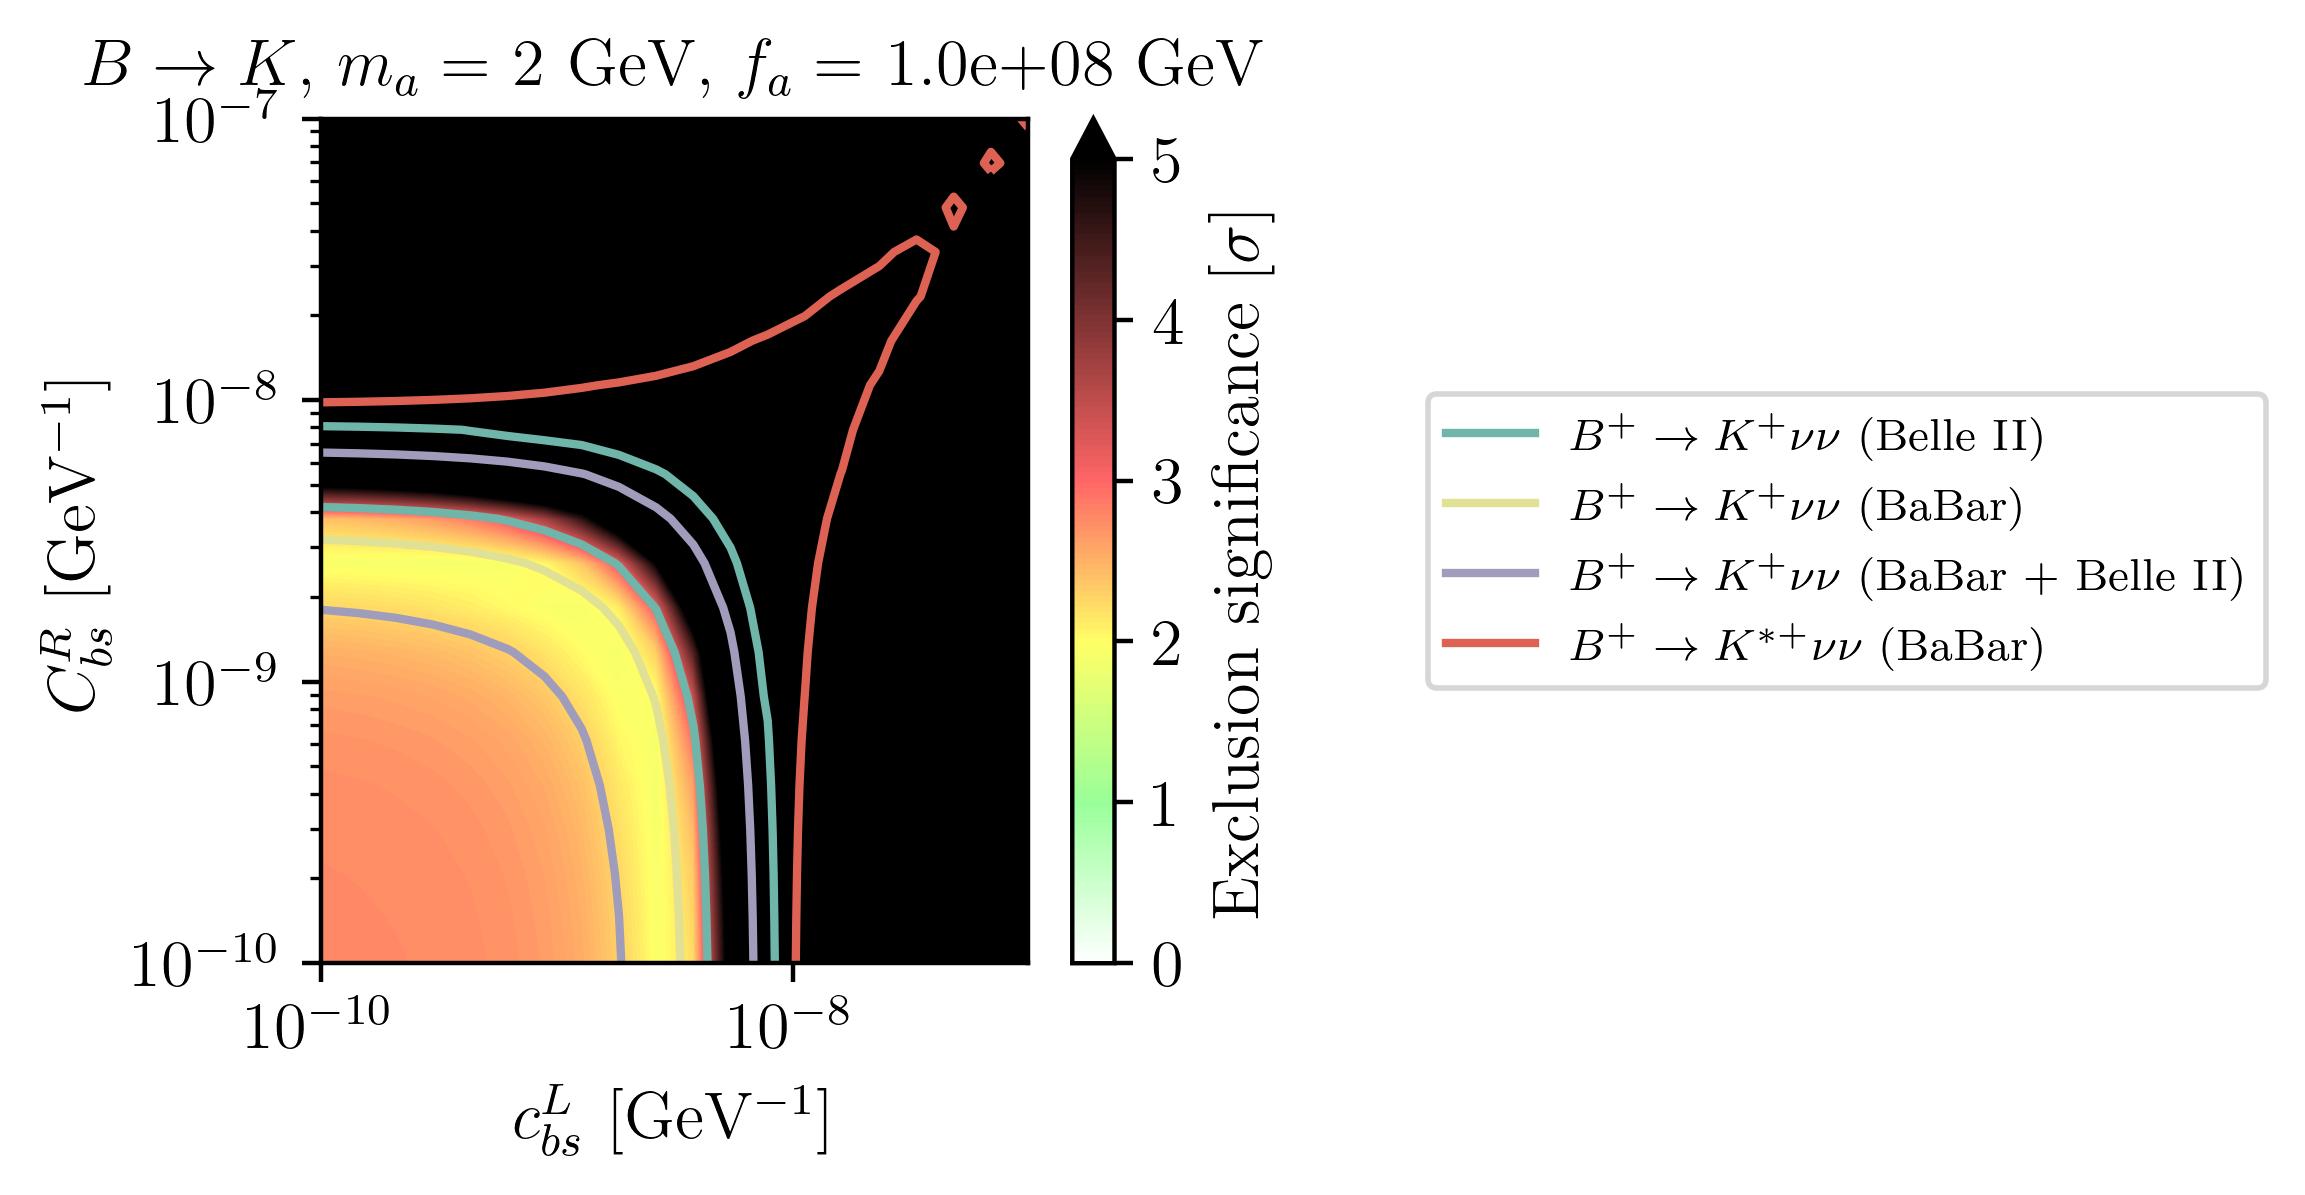

In [ ]:
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B+ -> K*+ a': r'$B^+ \to K^{*+} \nu \nu$'}

legend_elements = []

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14/2.54, 8/2.54), dpi=400)
exclusionplot(cbsL_grid/fa, cbsR_grid/fa, chi2_cbsLR, r'$c_{bs}^L$ [GeV$^{-1}$]', r'$C_{bs}^R$ [GeV$^{-1}$]', rf'$B \to K$, $m_a=$ {ma} GeV, $f_a=$ {fa:.1e} GeV',  tex, ax=ax)

In [ ]:
transitions_sd = [
    'K+ -> pi+ a',
    'KL -> pi0 a',
    'K+ -> pi+ gamma gamma',
    'K+ -> pi+ e e',
    'K+ -> pi+ mu mu',
]

transitions_sd_lfv = [
    'K+ -> pi+ mu e',
    'KL -> pi0 mu e',
]

transitions_bd = [
    # 'B+ -> pi+ a',
    # 'B0 -> pi0 a',
    # 'B+ -> rho+ a',
    # 'B0 -> rho0 a',
    'B+ -> pi+ e e',
    'B0 -> pi0 e e',
    # 'B+ -> pi+ mu mu',
    # 'B0 -> pi0 mu mu',
]

transitions_bd_lfv = [
    'B+ -> pi+ tau e',
    'B+ -> pi+ tau mu',
]

transitions_bs = [
    'B+ -> K+ a',
    'B0 -> K0 a',
    'B+ -> K*+ a',
    'Bs -> phi a',
    'B+ -> K+ gamma gamma',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'B+ -> K+ tau tau',
    'B0 -> K*0 tau tau',
    'B+ -> K+ pi0 pi+ pi-',
    'B0 -> K0 pi0 pi+ pi-',
    'B+ -> K+ eta pi+ pi-',
    'B0',
    'B+',
]

transitions_bs_lfv = [
    'B+ -> K+ mu e',
    'B0 -> K0 mu e',
    'B+ -> K*+ mu e',
    'B0 -> K*0 mu e',
    'B+ -> K+ tau e',
    'B+ -> K+ tau mu',
    'B0 -> K*0 tau mu',
]

transitions_cu = [
    'D0 -> pi0 a',
    'D0 -> pi0 e e',
    'D0 -> eta e e',
    'D0 -> rho0 e e',
    'D+ -> pi+ e e',
    'Ds+ -> K+ e e',
    'D0 -> pi0 a',
    'D0 -> pi0 e e',
    'D0 -> eta e e',
    'D0 -> rho0 e e',
    'D+ -> pi+ e e',
    'Ds+ -> K+ e e',
    'D0->pi0 mu mu',
    'D0->mu mu',
    'D0->e e',
    'D0->eta mu mu',
    'D0->rho0 mu mu',
    'D+->pi+ mu mu',
    'Ds+->K+ mu mu',
    'D+->rho+ mu mu',
    'x_D0',
    'phi12_D0',
]

transitions_cu_lfv = [
    'D0 -> pi0 mu e',
    'D+ -> pi+ mu e',
    'D0 -> eta mu e',
    'D0 -> rho0 mu e',
    'Ds+ -> K+ mu e',
    'Ds+ -> K*+ mu e',
]

transitions_quarkonia = [
    'J/psi -> gamma a',
    'Y(1S) -> gamma a',
    'Y(3S) -> gamma a',
    'J/psi -> gamma gamma gamma',
    ('e e -> gamma gamma gamma', 10.58**2),
    'J/psi -> mu mu gamma',
    'Y(1S) -> mu mu gamma',
    'Y(3S) -> mu mu gamma',
    'Y(1S) -> tau tau gamma',
    'Y(3S) -> tau tau gamma',
    'Y(3S) -> gamma hadrons',
    'Y(1S) -> gamma c c',
]

transitions_quarkonia_lfv = [
    'Y(1S) -> gamma e mu',
    'Y(1S) -> gamma e tau',
    'Y(1S) -> gamma mu tau',
]

transitions_lepton = [
    'mu -> e a',
    'mu -> e gamma gamma',
    'mu -> e e e',
    'tau -> e a',
    'tau -> e gamma gamma',
    'tau -> e e e',
    'tau -> e mu mu',
    'tau -> mu a',
    'tau -> mu gamma gamma',
    'tau -> mu e e',
    'tau -> mu mu mu',
]

transitions=transitions_bs + transitions_bs_lfv + transitions_cu + transitions_cu_lfv + transitions_quarkonia + transitions_quarkonia_lfv + transitions_lepton + transitions_bd + transitions_bd_lfv + transitions_sd + transitions_sd_lfv

In [33]:
z=10**np.linspace(-5,1,1000)
z2=np.logspace(-5,1,1000)